Author: Nedal Mohammad

# Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

# Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank


# Data Dictionary


1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. Customer_Age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
16. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
18. Total_Trans_Ct: Total Transaction Count (Last 12 months)
19. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
20. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
21. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Imports for notebook

#DataFrame manipulation and general imports
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
import numpy as np
import scipy.stats as stats

# Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#split data/tune models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

#Impute missing values
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

#feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
#Bagging Classifier models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Boosting classifier models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#!pip3 install imblearn --user
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#random imports
import warnings
warnings.filterwarnings('ignore')

In [2]:
bankchurners=pd.read_csv('BankChurners.csv') #Import the data 
data=bankchurners.copy() #create a copy of the data, which will be used from now on

In [3]:
data.head() #View the first 5 rows of the data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [4]:
data.tail() #View the last 5 rows of the data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In the bank dataframe we are given some information about the customer and their accounts with the bank. The dataframe will be used to generate classification models that can identify whether or not a customer will attrite - making Attrition_Flag our desired target variable. In the data, there is a unique identifier which we do not need for our analysis so it will be dropped. We see a mix of categorical and numerical features. We also see some missing values. We will start by performing an Exploratory Data Analysis . The goal of this analysis is to investigate the data, visualize trends between variables, and distinguish features which are a good predictor of customer attrition. 

In [5]:
data.drop(['CLIENTNUM'],axis=1,inplace=True) #This column is not useful 

# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Categorical variables are stored under the object data type which is memory intensive, So they will be converted to the categorical datatype to save memory:

In [7]:
#Converting Categorical features to data type category
data['Attrition_Flag']=data['Attrition_Flag'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['Education_Level']=data['Education_Level'].astype('category')
data['Marital_Status']=data['Marital_Status'].astype('category')
data['Income_Category']=data['Income_Category'].astype('category')
data['Card_Category']=data['Card_Category'].astype('category')
print('The data has', data.shape[0],' rows and', data.shape[1], 'columns')
data.info()

The data has 10127  rows and 20 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_

We have reduced memory consumption from 1.5+ MB to 1.1 MB.
Let's look at basic statistics on the numerical features:

In [8]:
data.describe().T #generates basic statistics for numerical features

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

We can see that there are no missing values for the numerical features. It is evident that there will be outliers in atleast a few of the columns (maximum value is much greater than 75% percent tile). Some of the columns are skewed. There are both right and left skews in the data. 

And now for the categorical features:

In [9]:
data.describe(include='category').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

A quick check for duplicated values in the data:

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

Let's check the number of unique values in each column:

In [11]:
data.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

We can see that some of the numerical columns have only a few unique values. This can probably be changed to a categorical but lets view the unique values for the features.
Starting with the already categorical variables we have:

In [12]:
for col in data.select_dtypes(include=['category']): # for each column with a data type of category
    print(col) #print the column name for organization
    print(data[col].unique()) #print the unique values the category can be
    print( ) #print an empty line for organization

Attrition_Flag
['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Existing Customer', 'Attrited Customer']

Gender
['M', 'F']
Categories (2, object): ['M', 'F']

Education_Level
['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']

Marital_Status
['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Married', 'Single', 'Divorced']

Income_Category
['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
Categories (6, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']

Card_Category
['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Silver', 'Platinum']



Everything here looks to be in order. We notice a few things such as missing values represented as the unique value 'nan'. In Income_Category we see a unique value as 'abc'. This must be an error and will have to be corrected.
Let's look at the numerical columns with less than 20 unique values, as these sometimes represent categories.

In [13]:
for col in data.select_dtypes(include=[np.number]): #for each column with a numerical datatype
    if data[col].nunique() < 20: #if the number of unique values is less than 20
        print(col) #print the feature name for organization
        print(data[col].unique()) #print the unique values
        print( ) #print a space for organization

Dependent_count
[3 5 4 2 0 1]

Total_Relationship_Count
[5 6 4 3 2 1]

Months_Inactive_12_mon
[1 4 2 3 6 0 5]

Contacts_Count_12_mon
[3 2 0 1 4 5 6]



All of these columns represent discrete numerical variables and no further action is needed regarding datatypes.

Let's look at the error in Income_Category where there is an 'abc' category.

In [14]:
data[data['Income_Category'] == 'abc']

Attrition_Flag  Customer_Age Gender  Dependent_count  \
19     Existing Customer            45      F                2   
28     Existing Customer            44      F                3   
39     Attrited Customer            66      F                0   
44     Existing Customer            38      F                4   
58     Existing Customer            44      F                5   
...                  ...           ...    ...              ...   
10021  Attrited Customer            30      F                1   
10040  Attrited Customer            50      F                3   
10083  Existing Customer            42      F                4   
10092  Attrited Customer            40      F                3   
10119  Attrited Customer            55      F                3   

      Education_Level Marital_Status Income_Category Card_Category  \
19           Graduate        Married             abc          Blue   
28         Uneducated         Single             abc          Blue   
39          Doctorate        Married             abc          Blue   
44           Graduate         Single             abc          Blue   
58           Graduate        Married             abc          Blue   
...               ...            ...             ...           ...   
10021        Graduate        Married             abc          Blue   
10040       Doctorate         Single             abc          Blue   
10083      Uneducated        Married             abc          Blue   
10092        Graduate        Married             abc          Blue   
10119      Uneducated         Single             abc          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
19                 37                         6                       1   
28                 34                         5                       2   
39                 56                         5                       4   
44                 28                         2                       3   
58                 35                         4                       1   
...               ...                       ...                     ...   
10021              18                         4                       1   
10040              36                         4                       3   
10083              23                         4                       1   
10092              25                         1                       2   
10119              47                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                         2       14470.0                 1157   
28                         2       10100.0                    0   
39                         3        7882.0                  605   
44                         3        9830.0                 2055   
58                         2        6273.0                  978   
...                      ...           ...                  ...   
10021                      4        4377.0                 2517   
10040                      3        5173.0                    0   
10083                      2        8348.0                    0   
10092                      3        6888.0                 1878   
10119                      3       14657.0                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19             13313.0                 0.966             1207              21   
28             10100.0                 0.525             1052              18   
39              7277.0                 1.052              704              16   
44              7775.0                 0.977             1042              23   
58              5295.0                 2.275             1359              25   
...                ...                   ...              ...             ...   
10021           1860.0                 0.941             8759              74   
10040           5173.0

We see 20 columns in which this mistake has occurred. There doesn't appear to be a pattern here, so we will have to convert them all to NaN and later impute them.

In [15]:
data['Income_Category'].replace('abc', np.nan, inplace=True)

Let's verify there is no longer a category 'abc' and there is now a category 'nan'

In [16]:
data['Income_Category'].unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +']

# Univariate Analysis

Goals:
1. For Numerical Variables, observe spread and distribution of data.
2. For Categorical Variables, observe frequency

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#While doing uni-variate analysis of categorical variables we want to study their frequency
#This function takes the categorical variable as an input and returns the frequency bar graph 
def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

In [18]:
cat_cols = data.select_dtypes(include=['category']) #all categorical features here
num_cols = data.select_dtypes(include = np.number) #all numerical features here
print(cat_cols.shape) #useful to know
print(num_cols.shape) #useful to know

(10127, 6)
(10127, 14)


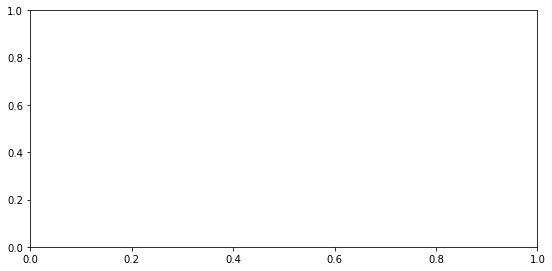

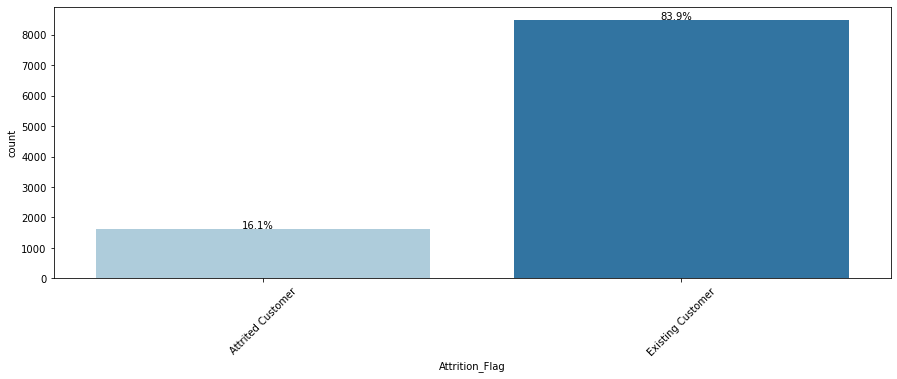

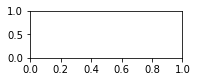

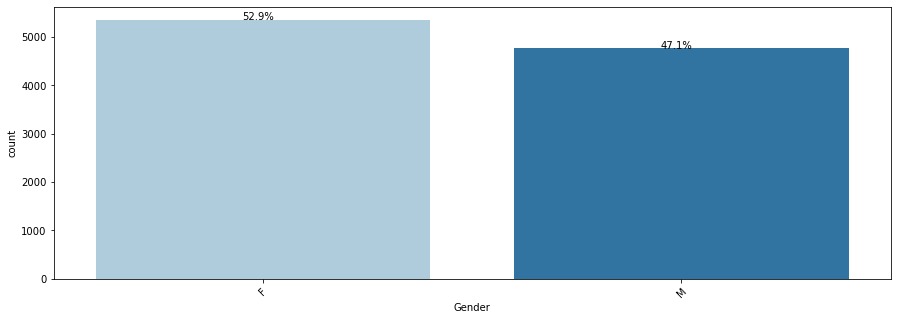

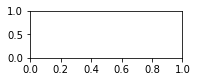

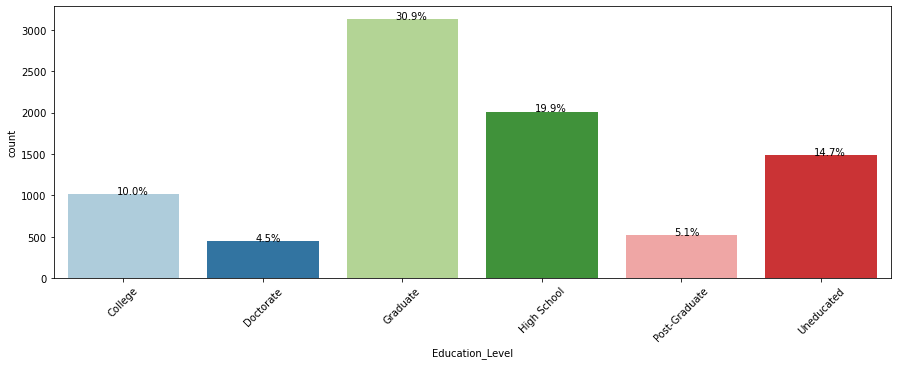

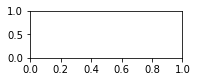

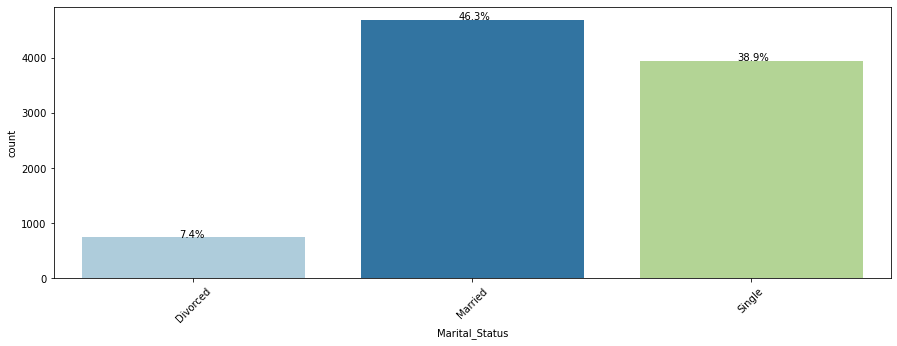

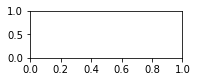

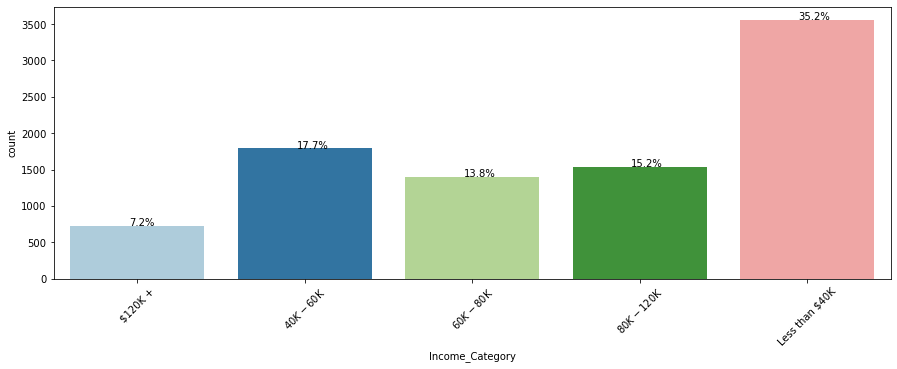

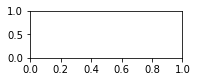

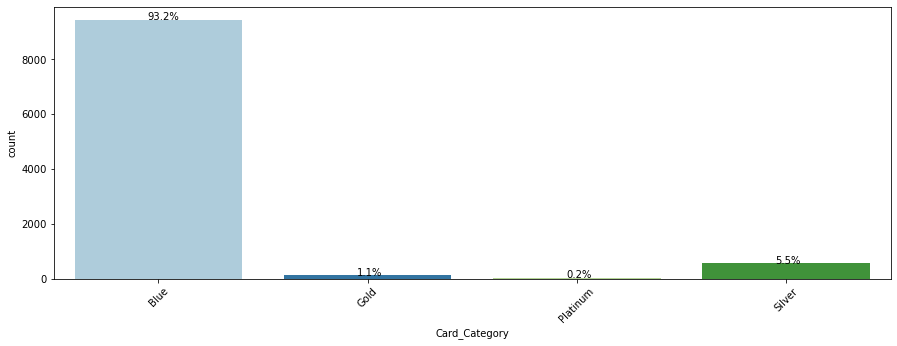

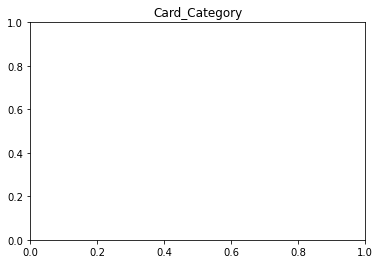

In [19]:

plt.figure(figsize=(20,20))
#for categorical features, create a bar plot
for i, variable in enumerate(cat_cols):
                     plt.subplot(4,2,i+1)
                     perc_on_bar(data,variable)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

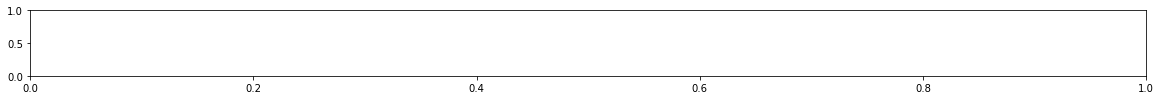

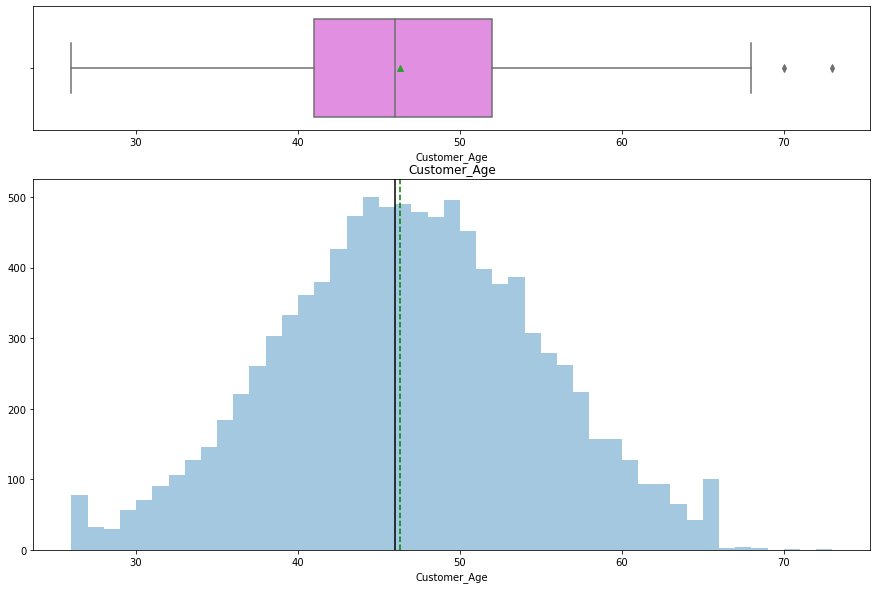

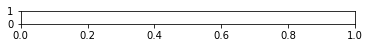

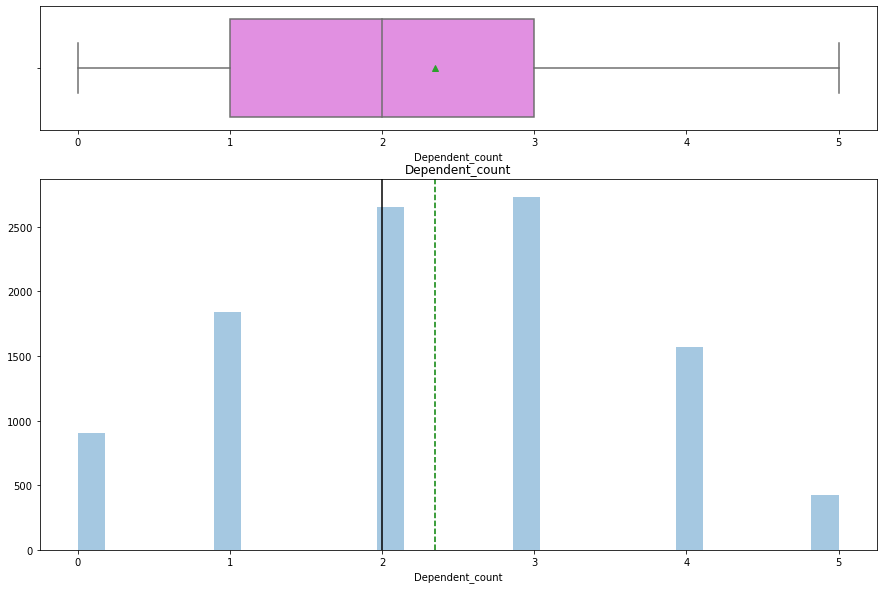

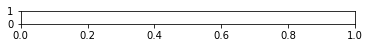

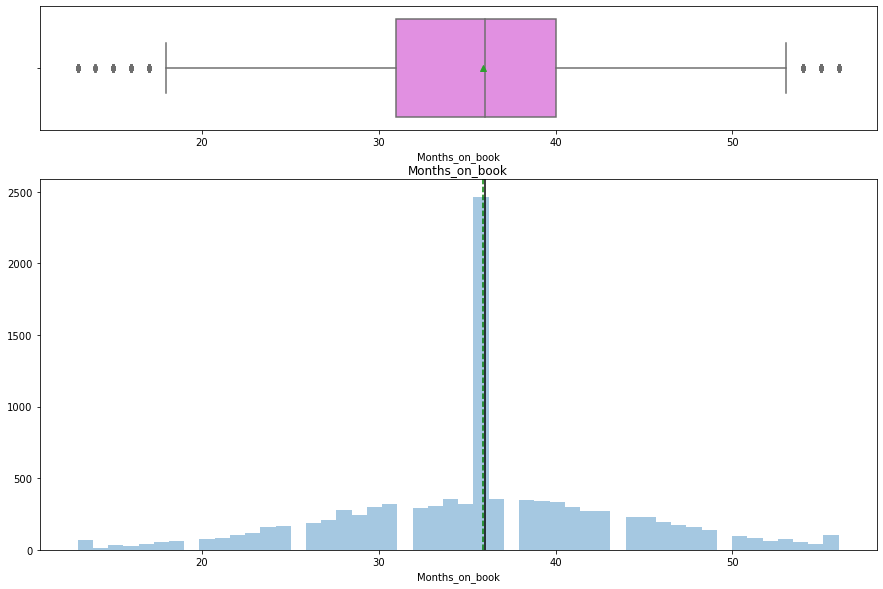

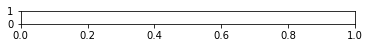

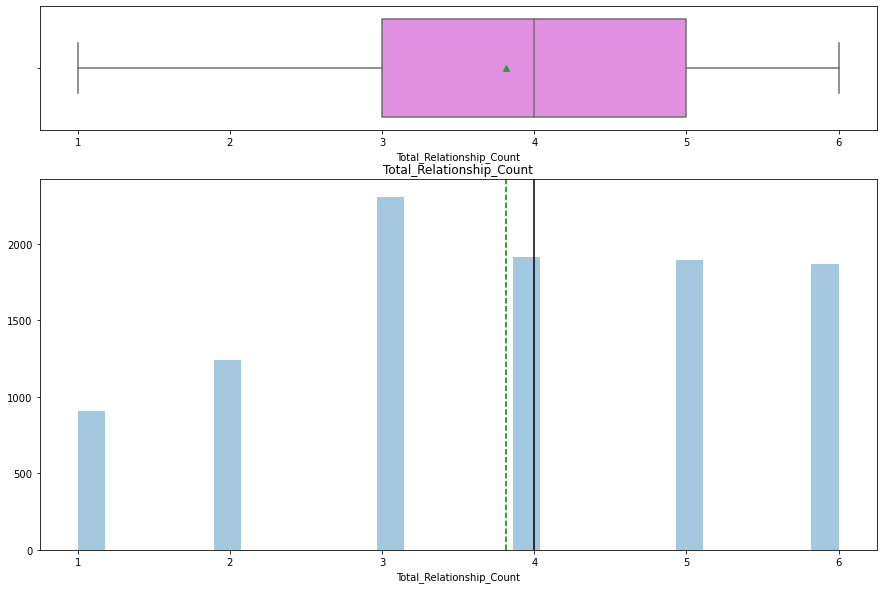

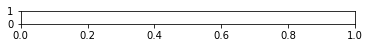

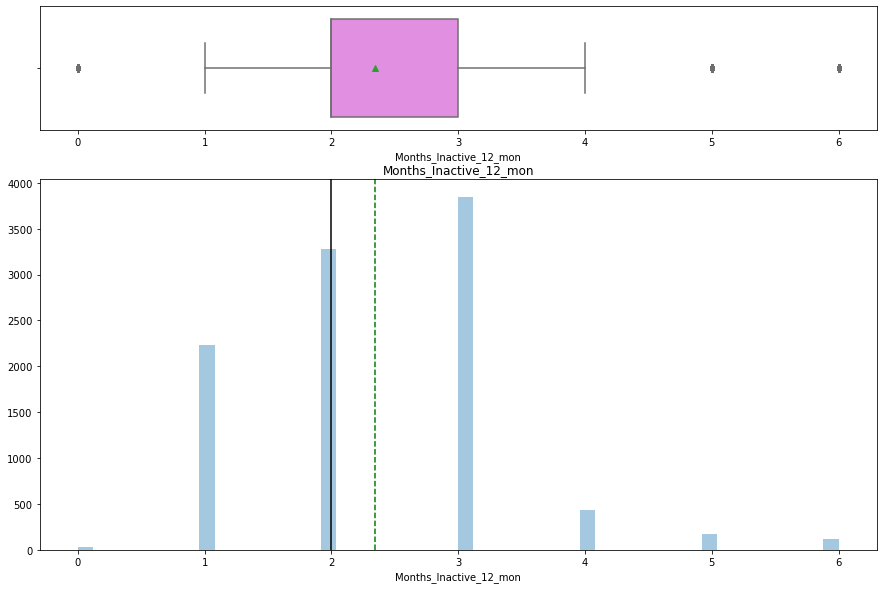

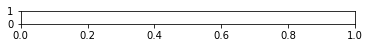

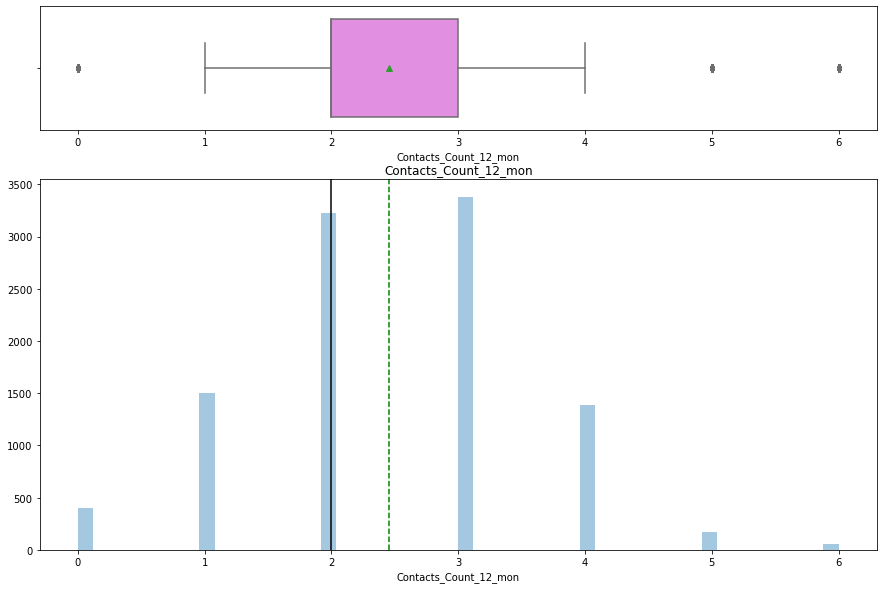

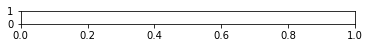

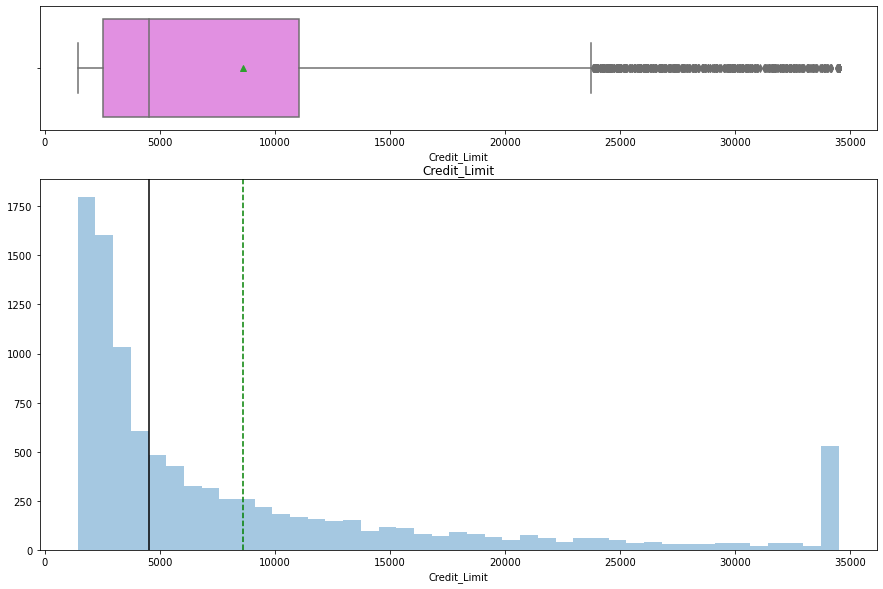

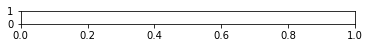

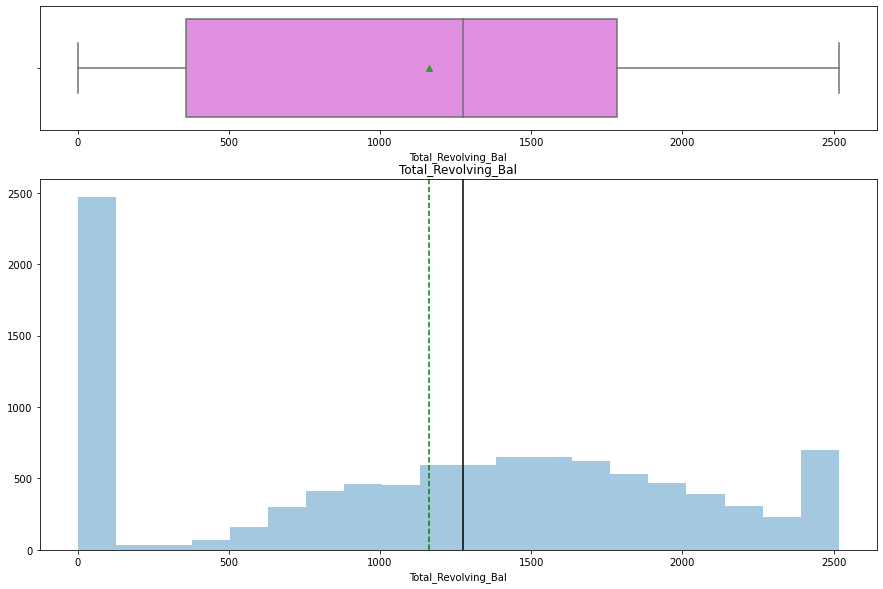

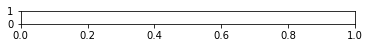

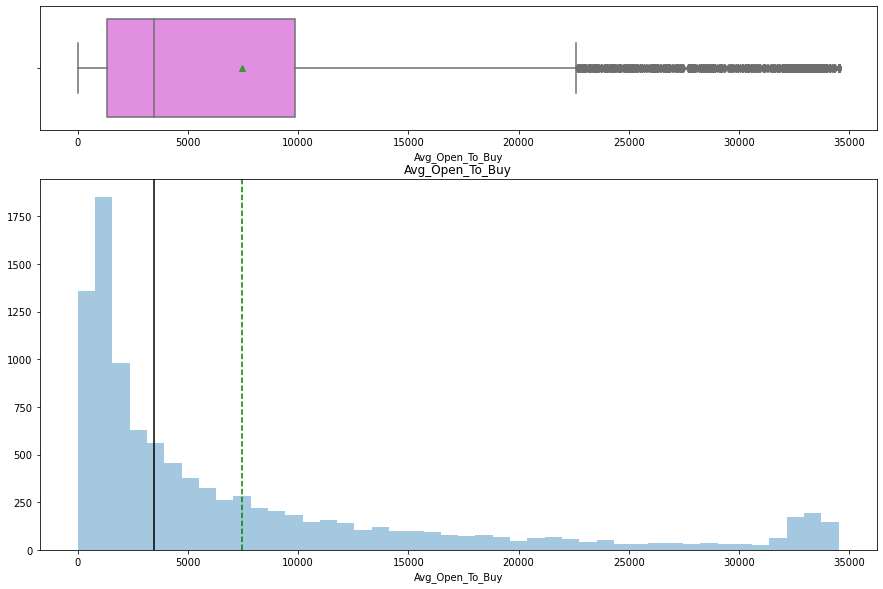

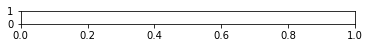

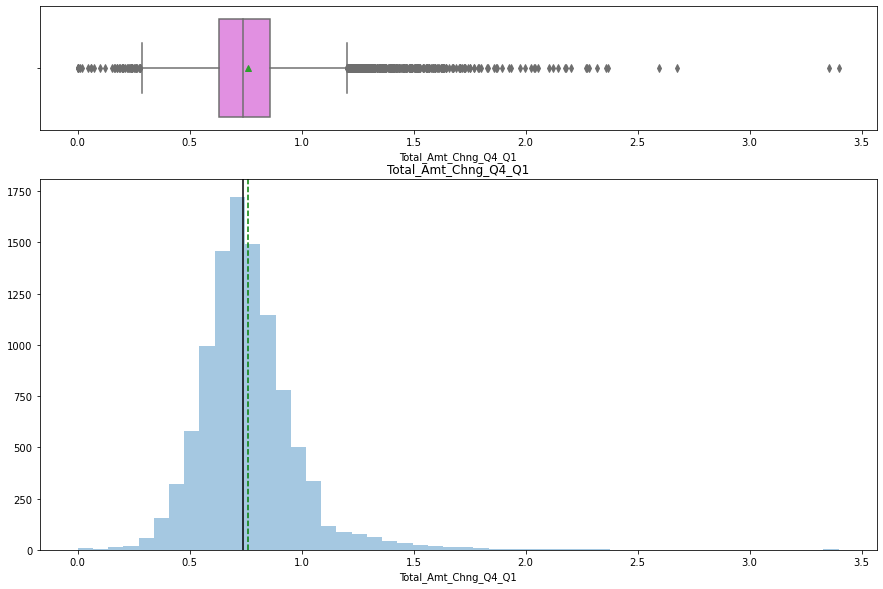

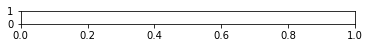

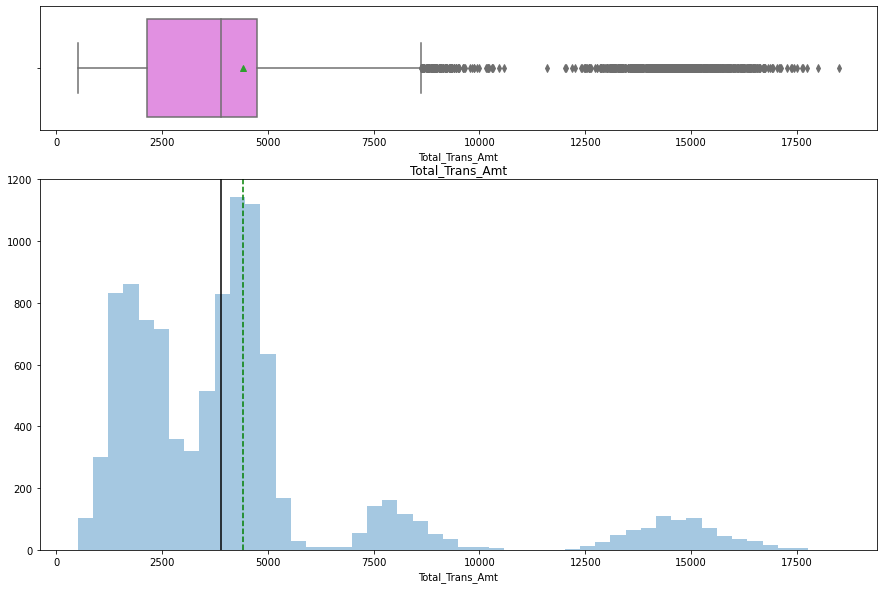

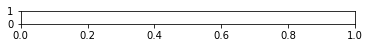

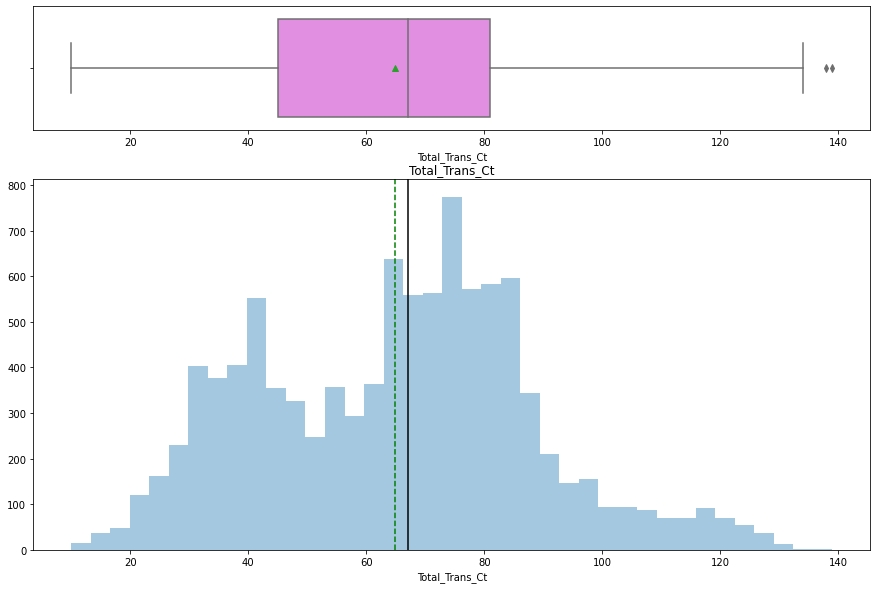

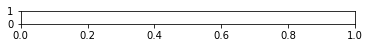

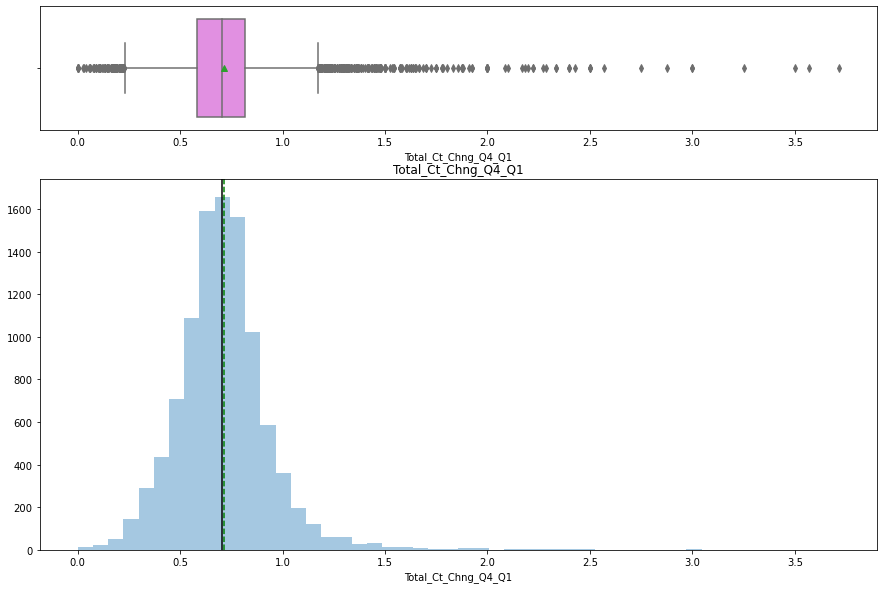

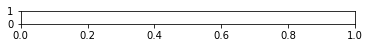

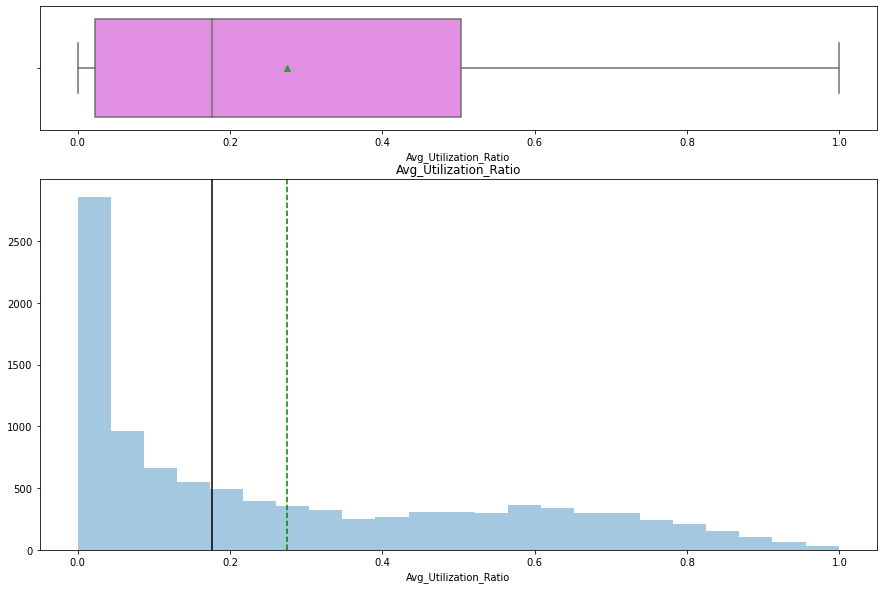

In [20]:

plt.figure(figsize=(20,20))
#for numerical features, create a histogram and a box plot
for i, variable in enumerate(num_cols):
                     plt.subplot(14,1,i+1)
                     histogram_boxplot(data[variable])
                     #plt.tight_layout()
                     plt.title(variable)
                     plt.show()
plt.show()

### Univariate Analysis Notes

The following notes can be interpretted from the above plots. Notes appear in the order for the respective plot they reference. 

#### Categorical Features:
1. Attrition_Flag (target variable) - For the target variable we see a major skew in the data. We are interested in the minority class here. 16.1% of customers have attrited while 83.9% are still existing customers.
2. Gender - For gender we see a pretty even distribution: 52.9% of customers are female while 47.1% are male
3. Education_Level - 30.9% of clients have completed college, followed by 19.9% completing only college and 14.7% being uneducated. Students in college represent 10.0% of the clients, while 5.1% have completed post graduate programs and 4.5% have completed a doctorate. This column of data represents an ordered categorical variable (or an Ordinal variable), however since the categories are out of order, I would like to instantiate an order. The order should be this: uneducated< Highschool < College < Graduate < Post Graduate < Doctorate. I will use this ordering to ordinally encode this variable as opposed to one hot encoding.
4. Marital_Status - 46.3% of clients are married while 38.9% are Single and 7.4% are Divorced.
5. Income_Category - 35.2% of clients make less than 40k/year while 17.7% make between 40 and 60k/year, 13.8% make between 60 and 80k/year, and 15.2% make between 80 and 100k/year. Only 7.2% of clients make more than 120k/year. This categorical variable is also ordinal. The order is: Less than 40k < 40-60 < 60-80 < 80-120 < 120+. This ordering will also be used to ordinally encode this variable.
6. Card Category - Most clients have the Blue card, at 93.2% while 5.5% have the silver card. Only 1.1% of customers have the gold card and even less have the platinum, at 0.2%.


** notes  - The reason we go out of our way to ordinally encode those categorical variables which have order is because it greatly reduces the dimensionality of the data. An ordinal categorical that is ordinally encoded can be fully represented in one column, while if it was one hot encoded like the rest, it would occupy as many columns as it has categories minus 1.

** I ran the code on the features initially one hot encoded and decided that the results from this exceeded all expectations. The algorithms don't really need any help (i.e. by reducing the dimensionality of the problem) since even with one hot encoding the feature space is still a reasonable size. Therefore, a one hot encoding will actually be used and as you will see, is completely sufficient for this problem.

#### Numerical Features:
1. Customer_Age - The average client has an age of about 46 years. The age column appears to have a really normal distribution. There are some minor outliers but nothing crazy here. These will probably be ignored. There is also little to no skew. 
2. Dependent_count - The average client has 2 dependents. This column appears to have a normal distribution. There are no outliers present. There is some positive skew with mean > median.
3. Months_on_book - The average client has been on book for about 36 months. The distribution appears to be normal, with a really high peak at the median. Either there was a big spike in clientelle 36 months ago, or missing values have already been imputed as the median into the dataset I started working with. There are some outliers but they are pretty minor and will probably be ignored. There is no skew in the column.
4. Total_Relationship_Count - The average client has had 4 buisness relations with the bank. The distribution is caught somewhere between normal and uniform, leaning towards normal. There are no outliers and there is minor negative skew with mean < median
5. Months_Inactive_12_mon - The average customer has been inactive for about 2-3 months. The distribution is normal. There are some outliers. There is some positive skew with mean > median.
6. Contacts_Count_12_mon - The average client has had between 2 and 3 contacts in the last 12 months. The distribution is normal. There are some outliers that represent real world trends and will left in the analysis. There is some positive skew with mean > median
7. Credit_Limit - The average client has a credit limit of about 8000, however because this feature is very skewed, I should also mention that more than 50% of clients have less than 5000 credit limit. There are lots of outliers but I do not want to disrupt the real world trend that exists here so the outliers will be included in the analysis. The distribution is highly positive skewed with mean >> median. Log transformation may help shift the distribution towards normal. 
8. Total_Revolving_Bal - The total revolving balance of the average customer is about 1150. However, a large portion of clients have 0 revolving balance. This causes a heavy negative skew in the data with mean < median. There are no outliers.
9. Avg_Open_To_Buy - The average customer leaves an average of about 7500 on the credit card to use for purchases. However, due to a majority of people leaving 0 or close to it, the median value is 3475. There are some outliers present, but they will be left alone as they represent real world trends. The distribution is skewed heavily positively with mean > median.
10. Total_Amt_Chng_Q4_Q1 - The average client has a ratio of total transaction amount between 4th and 1st quarters of about 0.75. The distribution of this feature is normal. There is no skew. There are some outliers. Most outliers will be kept, however the outliers on the upper end above 2.5 should be capped tot he nearest value.
11. Total_Trans_Amt - The average client has transacted a total of 4400. The distribution of this feature is very abnormal. It has 4 distinct peaks. These peaks could be a result of credit limit or some other factor, not sure at this point in time. There is minimal skew. There are some outliers as well, and one group of outliers represents an entire peak in the distribution. I will have to leave everything as it is here and apply only the general transformations I will use on all other features. I may explore other options if this doesn't seem optimal.
12. Total_Trans_Ct - The average client uses their card for about 64 transactions every 12 months. The distribution here is nearly normal but has a second peak in it. There is minimal skew. There are a couple of outliers that will be capped to the end of the whisker on the box plot.
13. Total_Ct_Chng_Q4_Q1 - The average client has a transaction count ratio between the 4th and 1st quarters of 0.71. The distribution here is normal. There is no skew but there are some outliers which must be capped. A multiple of IQR may be used here for capping this variable.
14. Avg_Utilization_Ratio - The average client has a utilization ratio of 0.27, meaning they only use 27% of the available credit. The distribution is relatively uniform except for a large group of people who aren't using their cards and report a utilization ratio of 0. This is causing a positive skew in the distribution with mean > median. There are no outliers.


** Notes: Before treating outliers I always run the data through the algorithms as it is to determine if altering the training data to improve the models ability to generalize is neccessary. In this case, the end results exceeded all expectations when outliers were included in the modelling. Therefore, all outliers will actually be included in the analysis.

# Bivariate Analysis

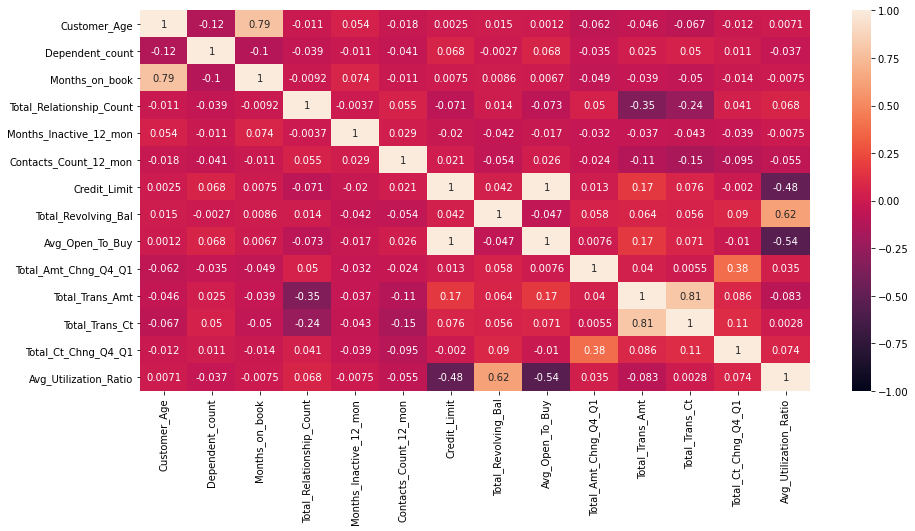

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

The highest correlation amongst any 2 numerical features is a perfect correlation between Credit_Limit and Avg_Open_To_Buy with a perfect correlation of 1. All other correlations are at most 0.81. 
The perfect correlation between credit limit and average open to buy suggests that most clients hardly use their credit cards with the bank.
We can view all the correlations by looking at a pair plot:

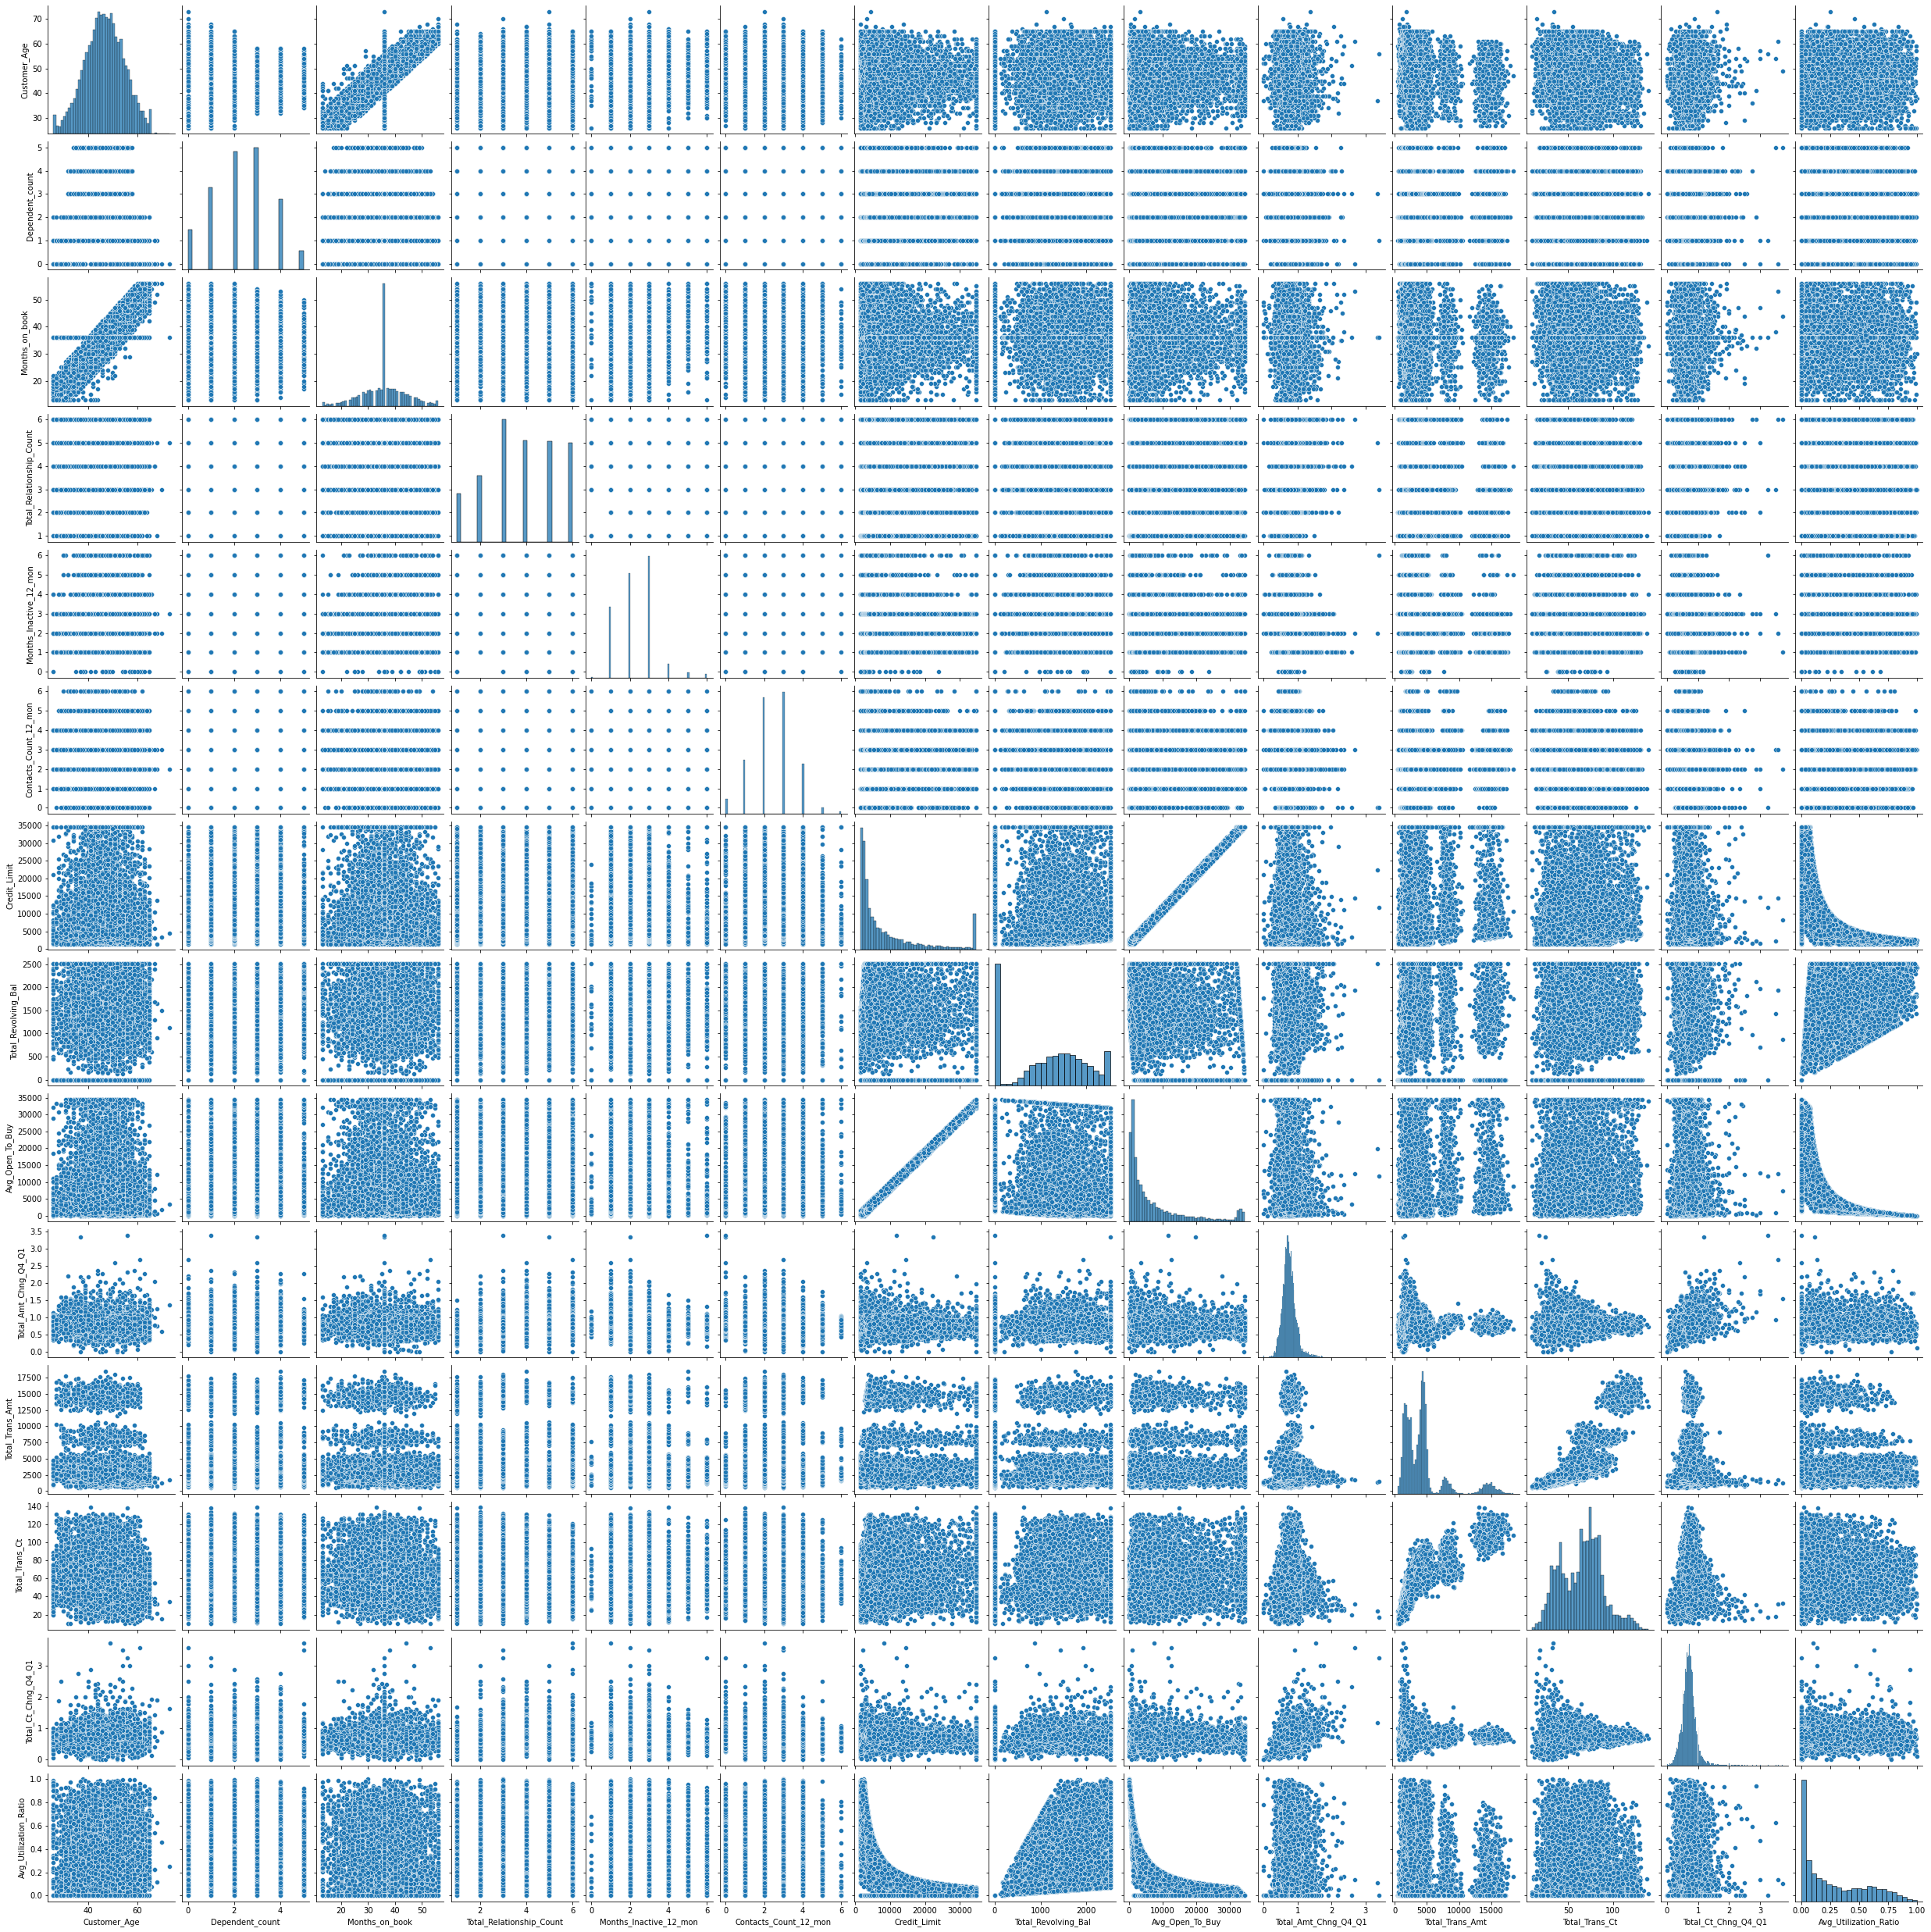

In [22]:
sns.pairplot(data=data.select_dtypes(np.number))
plt.show()

Because Credit_Limit and Avg_Open_To_Buy have a correlation coefficient of 1, the Credit_Limit column will be dropped from analysis, as it doesn't add any new information and adds a dimension.

In [23]:
data.drop(['Credit_Limit'], axis=1, inplace=True)

In [24]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

Let's compare every feature to our target variable:

In [25]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
Existing Customer                  0               8500   8500
All                             1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


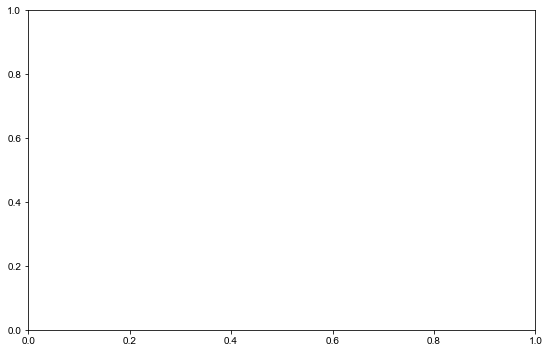

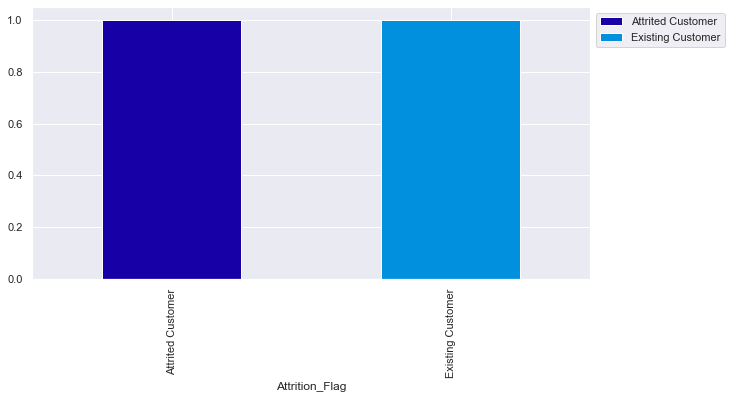

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


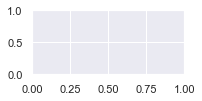

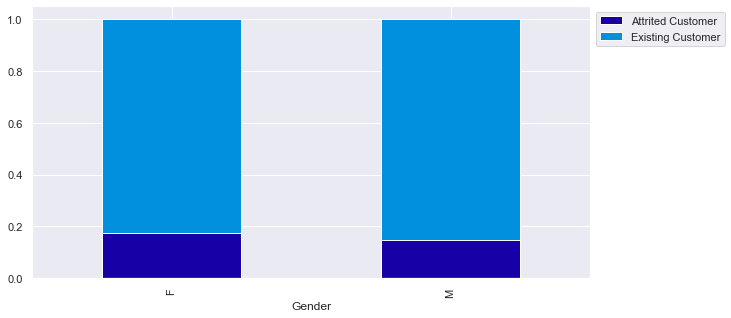

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
College                        154                859  1013
Doctorate                       95                356   451
Graduate                       487               2641  3128
High School                    306               1707  2013
Post-Graduate                   92                424   516
Uneducated                     237               1250  1487
All                           1371               7237  8608
------------------------------------------------------------------------------------------------------------------------


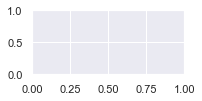

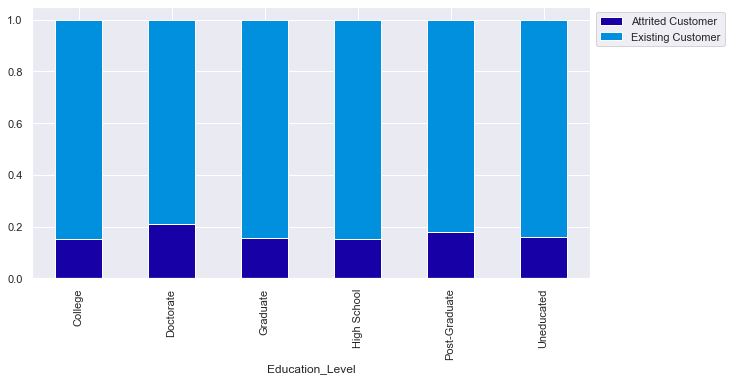

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
Divorced                      121                627   748
Married                       709               3978  4687
Single                        668               3275  3943
All                          1498               7880  9378
------------------------------------------------------------------------------------------------------------------------


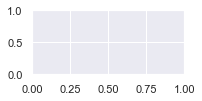

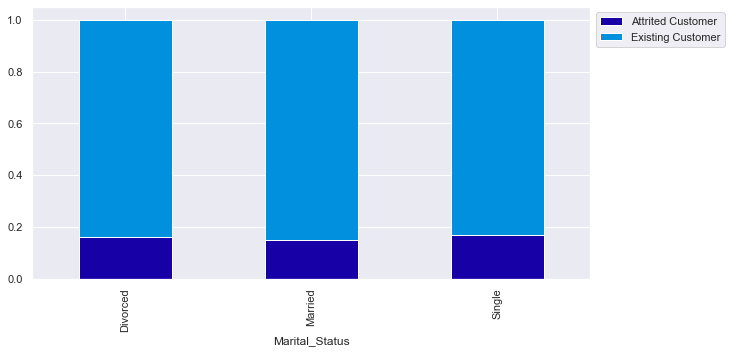

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
$120K +                        126                601   727
$40K - $60K                    271               1519  1790
$60K - $80K                    189               1213  1402
$80K - $120K                   242               1293  1535
Less than $40K                 612               2949  3561
All                           1440               7575  9015
------------------------------------------------------------------------------------------------------------------------


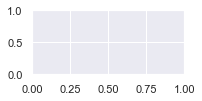

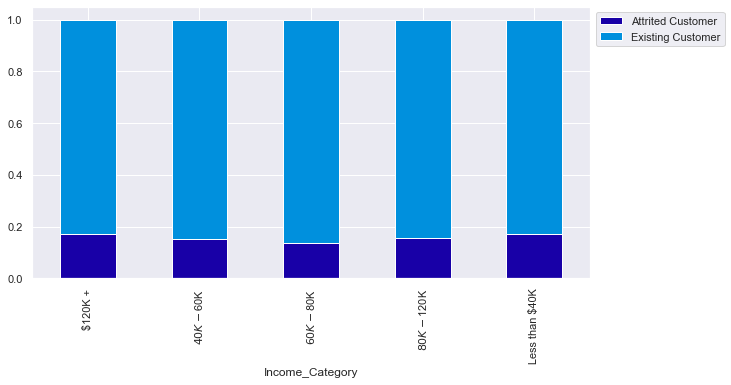

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


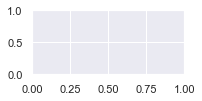

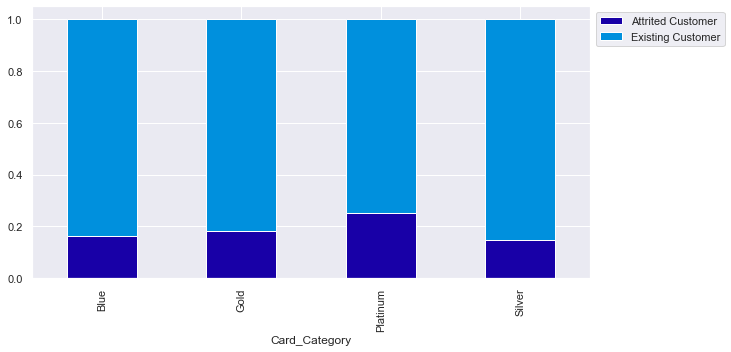

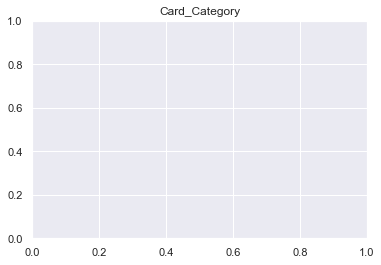

In [26]:
cols = data.select_dtypes(include=['category'])
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     stacked_plot(data[variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

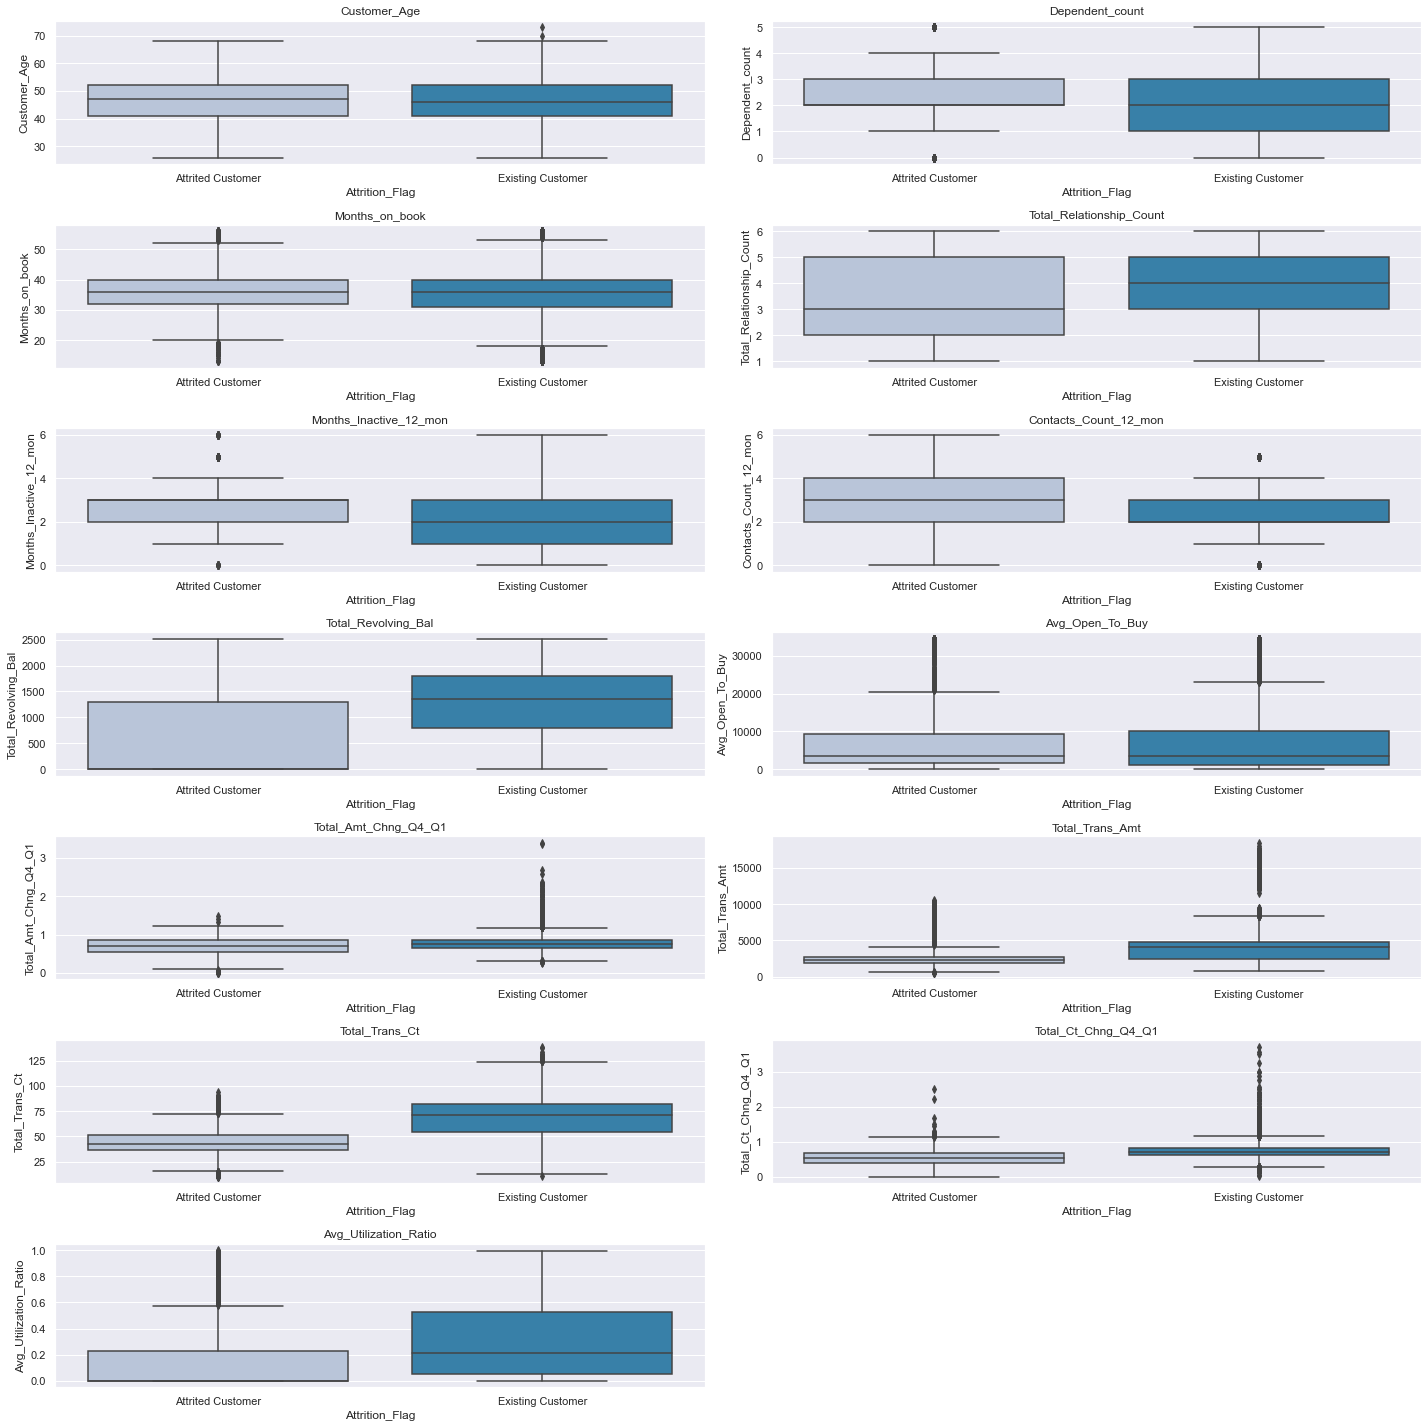

In [27]:
cols = data.select_dtypes(include=np.number)
plt.figure(figsize=(20,20))

for i, variable in enumerate(cols):
                     plt.subplot(7,2,i+1)
                     sns.boxplot(data["Attrition_Flag"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


### Bivariate Analysis Notes

The following notes can be interpretted from the above plots. Notes appear in the order for the respective plot they reference. 

#### Categorical Features:
1. Attrition_Flag (target variable) - We can see that there are 8500 existing customers and 1627 attrited customers.
2. Gender - It would appear that female clients attrite more often than male clients.
3. Education_Level - People who have education level less than college graduate share the same percentage of attriters. People who have post graduate education or a doctorate attrite slightly more often than the rest.
4. Marital_Status - Married people are slightly less likely to attrite than single or divorced people, who attrite roughly equally.
5. Income_Category - Attriters are mostly evenly distributed amongst the categories. A keen eye will notice that people in the middle income brackets attrite slightly less than the lowest and higher income brackets
6. Card Category - Clients with a platinum card attrite more than clients with other cards. Clients with the silver card attrite the least.



#### Numerical Features:
1. Customer_Age - Customer age does not appear to influence attrition
2. Dependent_count - People who attrite usually have more dependents.
3. Months_on_book - Months on book does not appear to influence attrition
4. Total_Relationship_Count - Existing customers generally have more interactions with the bank. A lot of people who attrite only have a few interactions with the bank.
5. Months_Inactive_12_mon - The longer a client is inactive the more likely they are to attrite.
6. Contacts_Count_12_mon - Clients who contact the bank more tend to attrite more.
8. Total_Revolving_Bal - Clietnts with less revolving balance tend to attrite more.
9. Avg_Open_To_Buy - Does not appear to influence attrition.
10. Total_Amt_Chng_Q4_Q1 - All outliers for this feature are existing clients. A slightly higher attrition rate when the total amount change between Q4 and Q1 is lower.
11. Total_Trans_Amt - All outliers for this feature are existing clients. Clients who attrite typically spend less money on their card
12. Total_Trans_Ct - Clients who use their card less frequently are more likely to attrite
13. Total_Ct_Chng_Q4_Q1 - When the transaction count is lower between Q4 and Q1 a client is more likely to attrite.
14. Avg_Utilization_Ratio - clients who attrite typically have a lower average utilization ratio.


# Data Pre-Processing


In [28]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [29]:
#obtaining a missing value count per column and sorting it.
data.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Income_Category             1112
Marital_Status               749
Avg_Utilization_Ratio          0
Months_on_book                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Card_Category                  0
Total_Relationship_Count       0
Total_Ct_Chng_Q4_Q1            0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Attrition_Flag                 0
dtype: int64

In [30]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X=data.drop(columns='Attrition_Flag')
Y=data['Attrition_Flag']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6885, 18) (1722, 18) (1520, 18)
(6885,) (1722,) (1520,)


#### Impute all missing values

In [31]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')


X_train["Education_Level"] = imp_mode.fit_transform(X_train[["Education_Level"]]) #Fit the imputer on train data and transform it
X_val["Education_Level"] = imp_mode.transform(X_val[["Education_Level"]]) #use previously derived transformation on validation set
X_test["Education_Level"] = imp_mode.transform(X_test[["Education_Level"]])#repeat for test set



X_train["Income_Category"] = imp_mode.fit_transform(X_train[["Income_Category"]])#Fit the imputer on train data and transform it
X_val["Income_Category"] = imp_mode.transform(X_val[["Income_Category"]])#use previously derived transformation on validation set
X_test["Income_Category"] = imp_mode.transform(X_test[["Income_Category"]])#repeat for test set


X_train["Marital_Status"] = imp_mode.fit_transform(X_train[["Marital_Status"]])#Fit the imputer on train data and transform it
X_val["Marital_Status"] = imp_mode.transform(X_val[["Marital_Status"]])#use previously derived transformation on validation set
X_test["Marital_Status"] = imp_mode.transform(X_test[["Marital_Status"]])#repeat for test set


In [32]:
X_train['Education_Level'].unique()

array(['High School', 'Uneducated', 'College', 'Graduate', 'Doctorate',
       'Post-Graduate'], dtype=object)

#### Encode categoricals

In [33]:
le=LabelEncoder() #use on the target (y)


#First encode the target
y_train=le.fit_transform(y_train) #learn the transformation from training data and use the same transformation to modify the test and validation data
y_val=le.transform(y_val)
y_test=le.transform(y_test)

# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

'''
#Encode Ordinal Categorical Variables
income_categories=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
educ_categories=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
oe=OrdinalEncoder(categories=[income_categories, educ_categories]) # use on Income_Category and Education_Level
X_train=pd.DataFrame(X_train)
X_val=pd.DataFrame(X_val)
X_test=pd.DataFrame(X_test)
X_train[[5,3]]= oe.fit_transform(X_train[[5,3]])
X_val[[5,3]]=oe.transform(X_val[[5,3]])
X_test[[5,3]]=oe.transform(X_test[[5,3]])

'''




"\n#Encode Ordinal Categorical Variables\nincome_categories=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']\neduc_categories=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']\noe=OrdinalEncoder(categories=[income_categories, educ_categories]) # use on Income_Category and Education_Level\nX_train=pd.DataFrame(X_train)\nX_val=pd.DataFrame(X_val)\nX_test=pd.DataFrame(X_test)\nX_train[[5,3]]= oe.fit_transform(X_train[[5,3]])\nX_val[[5,3]]=oe.transform(X_val[[5,3]])\nX_test[[5,3]]=oe.transform(X_test[[5,3]])\n\n"

In [34]:
X_train.head(10)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
5056            65                1              54                         3   
882             44                4              36                         5   
1214            54                2              44                         3   
2976            57                3              36                         3   
7547            40                3              36                         3   
2854            50                3              37                         3   
6211            57                2              41                         3   
1802            58                2              48                         4   
3213            49                2              39                         6   
9673            55                2              36                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
5056                       1                      3                 1438   
882                        3                      3                 1485   
1214                       1                      3                 1836   
2976                       1                      3                 1508   
7547                       3                      2                 2034   
2854                       2                      4                    0   
6211                       3                      3                    0   
1802                       1                      0                    0   
3213                       3                      2                 1963   
9673                       2                      1                    0   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5056           3161.0                 0.832             4208              69   
882             848.0                 0.692             1198              31   
1214           3577.0                 0.766             1164              43   
2976           6676.0                 0.789             4134              71   
7547           4350.0                 0.493             4413              83   
2854           1438.3                 0.868             3637              80   
6211           2796.0                 0.729             2196              35   
1802           2774.0                 0.721             1258              33   
3213           5260.0                 0.852             4127              70   
9673          10858.0                 0.787            14475             111   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
5056                0.865                  0.313         1   
882                 0.722                  0.637         0   
1214                0.593                  0.339         0   
2976                0.821                  0.184         0   
7547                0.886                  0.319         0   
2854                0.860                  0.000         0   
6211                0.750                  0.000         0   
1802                0.435                  0.000         1   
3213                0.842                  0.272         1   
9673                0.682                  0.000         0   

      Education_Level_Doctorate  Education_Level_Graduate  \
5056                          0                         0   
882                           0                         0   
1214                          0                         0   
2976                          0                         0   
7547                          0                         0   
2854                          0                         1   
6211                          0                         1   
1802                          0                         1   
3213                          0                         0   
9673                          1                         0   

      Education_Level_High School  Educat

Data is now in a format that most algoritms can handle, we will scale it before sending it to the models though.

#### Outlier Treatment

Results without treating outliers was exceptional. Model's were able to generalize well without altering the data. There were not any major outliers in the data, so the best thing to do is include the outliers in analysis.

#### Scaling

In [35]:
ss=StandardScaler() #instantiate the scaler
ss.fit(X_train) #derive a transformation from training data

#transform all sets of data with transformation
X_train=ss.transform(X_train)
X_val=ss.transform(X_val)
X_test=ss.transform(X_test)

# Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite - Loss of resources
2. Predicting a customer will not attrite  and the customer attrites - Loss of Income

#### Which case is more important? 
* Predicting that customer will not attrite the product but he attrites i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.


**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [36]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GB", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 97.28331760511692
Random forest: 98.65032430084334
GBM: 98.7367995326473
Adaboost: 97.85423688191854
Xgboost: 98.6848814392067
dtree: 96.10659236956816

Validation Performance:

Bagging: 0.9716262975778547
Random forest: 0.9847750865051903
GBM: 0.9923875432525952
Adaboost: 0.9813148788927336
Xgboost: 0.9903114186851211
dtree: 0.9591695501730104


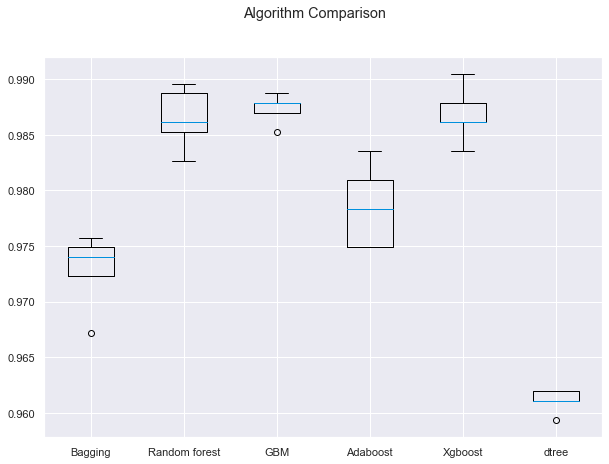

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Ranking of algorithm top scores (by median):
1. GB
2. xGB
3. Random Forest

## HyperParameter Tuning

**We will tune GB, xgboost, and random Forest models using RandomizedSearchCV.**

First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### GB classifier tuning

In [40]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 200, 10),
    "learning_rate": [0.5, 1],
    "max_depth": [1,2,3,4,5],
    "max_features":[3,6,9,None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

GB_tuned=randomized_cv.best_estimator_
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 190, 'max_features': 6, 'max_depth': 4, 'learning_rate': 0.5} with CV score=0.9877146152578679:
Wall time: 23.2 s


In [41]:
GB_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=4, max_features=6,
                           n_estimators=190, random_state=1)

In [42]:
GB_tuned_train = model_performance_classification_sklearn(GB_tuned, X_train, y_train)
print("Training performance")
GB_tuned_train

Training performance


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [43]:
GB_tuned_val = model_performance_classification_sklearn(GB_tuned, X_val, y_val)
print("Validation performance")
GB_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.978513  0.991003   0.983516  0.987246

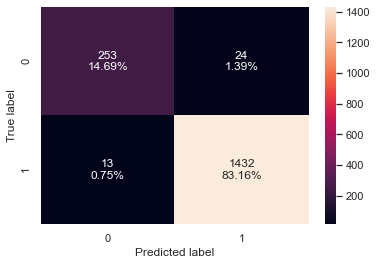

In [44]:
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned, X_val, y_val)

WOW! This model is performing incredibly well. I had to limit the learning rate parameter and run the randomsearch a few times to find a model that didn't just classify everything as '1'. It was well worth the time though. This model has outstanding metrics.

### xgboost classifier tuning

In [45]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[1],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

xGB_tuned=randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 1, 'gamma': 0} with CV score=0.9979234260549139:
Wall time: 24.3 s


In [46]:
xGB_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [47]:
xGB_tuned_train = model_performance_classification_sklearn(xGB_tuned, X_train, y_train)
print("Training performance")
xGB_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.925345  0.999481   0.918721  0.957401

In [48]:
xGB_tuned_val = model_performance_classification_sklearn(xGB_tuned, X_val, y_val)
print("Validation performance")
xGB_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.923926  0.999308   0.917408  0.956608

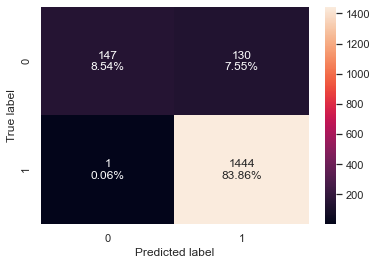

In [49]:
# creating confusion matrix
confusion_matrix_sklearn(xGB_tuned, X_val, y_val)

This model also does a good job. This model achieves a higher recall, but it does this predicting Existing Customer about 100 more times than the regular gradient boosting algorithm did. I fear this model won't generalize as well as the previous one, basically this model is being too careful. Let's try tuning the random forest next.

### RandomForest classifier tuning

In [50]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'max_features':[5,6,7,'auto'],
            'max_depth':np.arange(3,10,1),
            'min_weight_fraction_leaf':[0,0.01,0.03]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

RF_tuned=randomized_cv.best_estimator_ #saving the best model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'min_weight_fraction_leaf': 0.03, 'max_features': 'auto', 'max_depth': 3} with CV score=0.9923860453272217:
Wall time: 17 s


In [51]:
RF_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_weight_fraction_leaf=0.03,
                       n_estimators=90, random_state=1)

In [52]:
RF_tuned_train = model_performance_classification_sklearn(RF_tuned, X_train, y_train)
print("Training performance")
RF_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.888453  0.992559   0.887788  0.937255

In [53]:
RF_tuned_val = model_performance_classification_sklearn(RF_tuned, X_val, y_val)
print("Validation performance")
RF_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.883856  0.992388   0.883549  0.934811

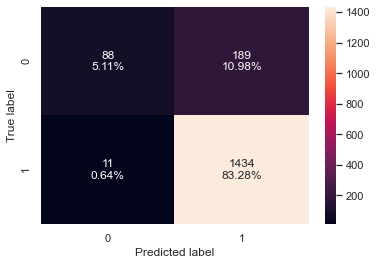

In [54]:
# creating confusion matrix
confusion_matrix_sklearn(RF_tuned, X_val, y_val)

This is the worst model thus far. Even after rerunning with different parameter grids multiple times, this is an example of one of the best performers I was able to achieve. This model is still good, gradient boosting is just much better for this problem.

# Try to further improve performance with over sampling to adjust class imbalance

By oversampling the training data that the model is fit over, perhaps we can improve performance

We will create artificial data points for attrited clients based off of the ones that already exist:

In [55]:
print("Before UpSampling, counts of label 'Existing_Customer': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'Attrited': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Existing_Customer': 5779
Before UpSampling, counts of label 'Attrited': 1106 

After UpSampling, counts of label 'Yes': 5779
After UpSampling, counts of label 'No': 5779 

After UpSampling, the shape of train_X: (11558, 28)
After UpSampling, the shape of train_y: (11558,) 



### GB model oversampling

In [56]:
GB_over = GradientBoostingClassifier(random_state=1)
# Training the basic GB model with training set
GB_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

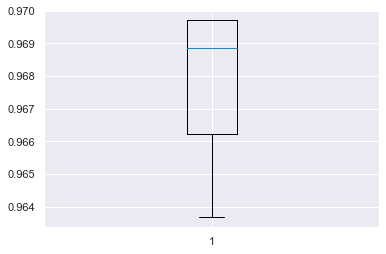

In [57]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=GB_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

The base GB model on over sampled data is actually performing a little bit worse than the original. Let's try to tune the hyperparameters on the validation set.

In [58]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 200, 10),
    "learning_rate": [0.1,0.2,0.3,0.4,0.5, 1],
    "max_depth": [1,2,3,4,5],
    "max_features":[3,6,9,None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

GB_over_tuned=randomized_cv.best_estimator_
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 180, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.3} with CV score=0.9840800491319521:
Wall time: 41.4 s


In [59]:
GB_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=180, random_state=1)

In [60]:
GB_over_tuned_train = model_performance_classification_sklearn(GB_over_tuned, X_train_over, y_train_over)
print("Training performance")
GB_over_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.998097  0.998097   0.998097  0.998097

In [61]:
GB_over_tuned_val = model_performance_classification_sklearn(GB_over_tuned, X_val, y_val)
print("Validation performance")
GB_over_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.977933  0.988927   0.984838  0.986878

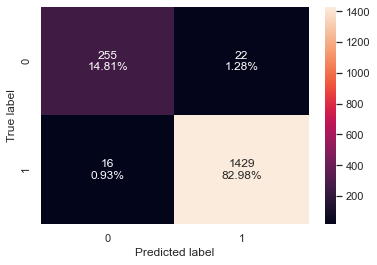

In [62]:
# creating confusion matrix
confusion_matrix_sklearn(GB_over_tuned, X_val, y_val)

This model is also performing exceptionally well. I think it performs about equally to the original GB model, however we still haven't compared test results.

### xGB model oversampling

In [63]:
xGB_over = XGBClassifier(random_state=1, eval_metric="logloss")

# Training the basic xGB model with training set
xGB_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

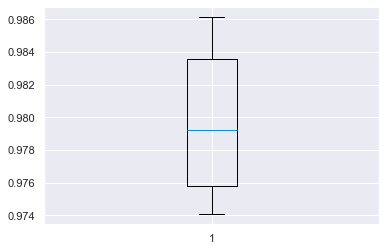

In [64]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xGB_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Once again, our base model is performing slightly higher than the SMOTE model. let's try and tune it:

In [65]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.5,1],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,6,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

xGB_over_tuned=randomized_cv.best_estimator_ #saving the best model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 90, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 1} with CV score=0.9960198624904507:
Wall time: 53.6 s


In [66]:
xGB_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [67]:
xGB_over_tuned_train = model_performance_classification_sklearn(xGB_over_tuned, X_train_over, y_train_over)
print("Training performance")
xGB_over_tuned_train

Training performance


Accuracy    Recall  Precision       F1
0  0.970324  0.999308   0.944553  0.97116

In [68]:
xGB_over_tuned_val = model_performance_classification_sklearn(xGB_over_tuned, X_val, y_val)
print("Validation performance")
xGB_over_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.962253  0.995848   0.960614  0.977914

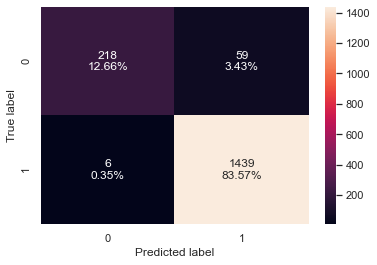

In [69]:
# creating confusion matrix
confusion_matrix_sklearn(xGB_over_tuned, X_val, y_val)

This model is also good, I would say much better than the original xGB. But still not beating the GB algorithms.

### RF model oversampling

In [70]:
RF_over = RandomForestClassifier(random_state=1)
# Training the basic GB model with training set
RF_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

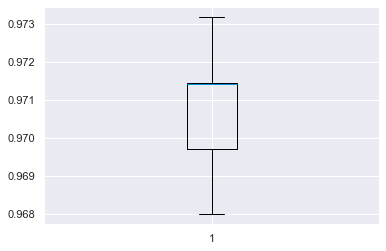

In [71]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=RF_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

And also for the base random forest, the oversampling technique has yielded slightly worse results for recall. Let's try tuning it:

In [72]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'max_features':[5,6,7,'auto'],
            'max_depth':np.arange(3,10,1),
            'min_weight_fraction_leaf':[0,0.01,0.03]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

RF_over_tuned=randomized_cv.best_estimator_ #saving the best model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 140, 'min_weight_fraction_leaf': 0, 'max_features': 7, 'max_depth': 9} with CV score=0.9567412633502599:
Wall time: 32.4 s


In [73]:
RF_over_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=9, max_features=7, min_weight_fraction_leaf=0,
                       n_estimators=140, random_state=1)

In [74]:
RF_over_tuned_train = model_performance_classification_sklearn(RF_over_tuned, X_train_over, y_train_over)
print("Training performance")
RF_over_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.983302  0.975082   0.991379  0.983163

In [75]:
RF_over_tuned_val = model_performance_classification_sklearn(RF_over_tuned, X_val, y_val)
print("Validation performance")
RF_over_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.950639  0.964014   0.976858  0.970394

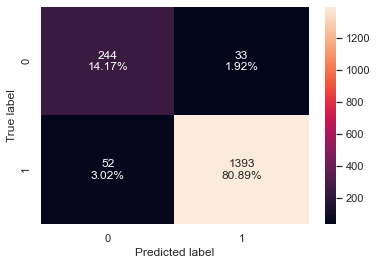

In [76]:
# creating confusion matrix
confusion_matrix_sklearn(RF_over_tuned, X_val, y_val)

This is a big improvement for the Random Forest model. Still about 5% misclassifications though. I would like to do better than this.

# Try to further improve performance with under sampling to adjust class imbalance

In this technique we will remove data from the Existing Customer class to create a 50/50 class mixture

In [77]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Existing Customer': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Attrited': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Existing customer': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Attrited': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Existing Customer': 5779
Before Under Sampling, counts of label 'Attrited': 1106 

After Under Sampling, counts of label 'Existing customer': 1106
After Under Sampling, counts of label 'Attrited': 1106 

After Under Sampling, the shape of train_X: (2212, 28)
After Under Sampling, the shape of train_y: (2212,) 



### GB Model Undersampling

In [78]:
GB_under = GradientBoostingClassifier(random_state=1)
# Training the basic GB model with training set
GB_under.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

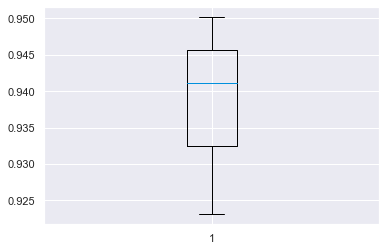

In [79]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=GB_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Slight reduction from the original GB model.

In [80]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 200, 10),
    "learning_rate": [0.1,0.2,0.3,0.4,0.5, 1],
    "max_depth": [1,2,3,4,5],
    "max_features":[3,6,9,None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

GB_under_tuned=randomized_cv.best_estimator_
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_features': 9, 'max_depth': 4, 'learning_rate': 0.3} with CV score=0.9547878194937018:
Wall time: 5.91 s


In [81]:
GB_under_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.3, max_depth=4, max_features=9,
                           n_estimators=70, random_state=1)

In [82]:
GB_under_tuned_train = model_performance_classification_sklearn(GB_under_tuned, X_train_un, y_train_un)
print("Training performance")
GB_under_tuned_train

Training performance


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [83]:
GB_under_tuned_val = model_performance_classification_sklearn(GB_under_tuned, X_val, y_val)
print("Validation performance")
GB_under_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.948316  0.944637    0.99345  0.968429

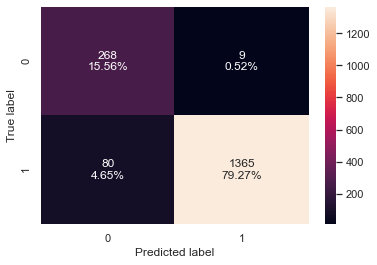

In [84]:
# creating confusion matrix
confusion_matrix_sklearn(GB_under_tuned, X_val, y_val)

This model isn't performing as well as the over sampled and regular GB models. We can try xGB on the undersampled data:

### xGB model undersampling

In [85]:
xGB_under =XGBClassifier(random_state=1, eval_metric="logloss")
# Training the basic GB model with training set
xGB_under.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

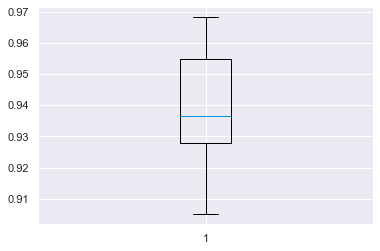

In [86]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=xGB_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [87]:
%%time 

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.5,1],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,6,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

xGB_under_tuned=randomized_cv.best_estimator_
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 70, 'max_depth': 1, 'learning_rate': 0.5, 'gamma': 5} with CV score=0.9900534018181076:
Wall time: 14.2 s


In [88]:
xGB_under_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [89]:
xGB_under_tuned_train = model_performance_classification_sklearn(xGB_under_tuned, X_train_un, y_train_un)
print("Training performance")
xGB_under_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.849458  0.995479   0.770469  0.868639

In [90]:
xGB_under_tuned_val = model_performance_classification_sklearn(xGB_under_tuned, X_val, y_val)
print("Validation performance")
xGB_under_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.941347  0.993772   0.939791  0.966028

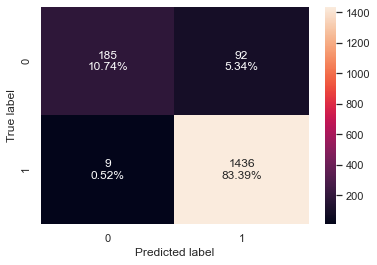

In [91]:
# creating confusion matrix
confusion_matrix_sklearn(xGB_under_tuned, X_val, y_val)

The model makes a misclassification about 6% of the time. Still havent beaten the original GB models.

### RF model undersampling

In [92]:
RF_under =RandomForestClassifier(random_state=1)
# Training the basic GB model with training set
RF_under.fit(X_train_un,y_train_un)

RandomForestClassifier(random_state=1)

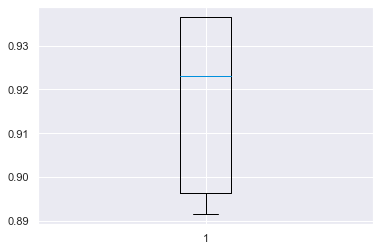

In [93]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=RF_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Clear reduction in performance. lets try tuning it:

In [94]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,200,10),
            'max_features':[5,6,7,'auto'],
            'max_depth':np.arange(3,10,1),
            'min_weight_fraction_leaf':[0,0.01,0.03]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

RF_under_tuned=randomized_cv.best_estimator_
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 170, 'min_weight_fraction_leaf': 0, 'max_features': 5, 'max_depth': 8} with CV score=0.9276629570747218:
Wall time: 8.92 s


In [95]:
RF_under_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=8, max_features=5, min_weight_fraction_leaf=0,
                       n_estimators=170, random_state=1)

In [96]:
RF_under_tuned_train = model_performance_classification_sklearn(RF_under_tuned, X_train_un, y_train_un)
print("Training performance")
RF_under_tuned_train

Training performance


Accuracy    Recall  Precision        F1
0  0.979204  0.972875   0.985348  0.979072

In [97]:
RF_under_tuned_val = model_performance_classification_sklearn(RF_under_tuned, X_val, y_val)
print("Validation performance")
RF_under_tuned_val

Validation performance


Accuracy    Recall  Precision        F1
0  0.921603  0.921107   0.984467  0.951734

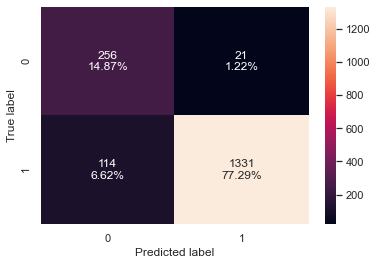

In [98]:
# creating confusion matrix
confusion_matrix_sklearn(RF_under_tuned, X_val, y_val)

This model appears to be slightly overfit for recall and accuracy. 

### Comparing all tuned models

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GB_tuned_train.T,
        GB_over_tuned_train.T,
        GB_under_tuned_train.T,
        xGB_tuned_train.T,
        xGB_over_tuned_train.T,
        xGB_under_tuned_train.T,
        RF_tuned_train.T,
        RF_over_tuned_train.T,
        RF_under_tuned_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting",
    "Gradient Boosting w/ over sampled data",
    "Gradient Boosting w/ under sampled data",
    "Extreme Gradient Boosting",
    "Extreme Gradient Boosting w/ over sampled data",
    "Extreme Gradient Boosting w/ under sampled data",
    "Random Forest",
    "Random Forest w/ over sampled data",
    "Random Forest w/ under sampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boosting  Gradient Boosting w/ over sampled data  \
Accuracy                 1.0                                0.998097   
Recall                   1.0                                0.998097   
Precision                1.0                                0.998097   
F1                       1.0                                0.998097   

           Gradient Boosting w/ under sampled data  Extreme Gradient Boosting  \
Accuracy                                       1.0                   0.925345   
Recall                                         1.0                   0.999481   
Precision                                      1.0                   0.918721   
F1                                             1.0                   0.957401   

           Extreme Gradient Boosting w/ over sampled data  \
Accuracy                                         0.970324   
Recall                                           0.999308   
Precision                                        0.944553   
F1                                               0.971160   

           Extreme Gradient Boosting w/ under sampled data  Random Forest  \
Accuracy                                          0.849458       0.888453   
Recall                                            0.995479       0.992559   
Precision                                         0.770469       0.887788   
F1                                                0.868639       0.937255   

           Random Forest w/ over sampled data  \
Accuracy                             0.983302   
Recall                               0.975082   
Precision                            0.991379   
F1                                   0.983163   

           Random Forest w/ under sampled data  
Accuracy                              0.979204  
Recall                                0.972875  
Precision                             0.985348  
F1                                    0.979072

In [100]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        GB_tuned_val.T,
        GB_over_tuned_val.T,
        GB_under_tuned_val.T,
        xGB_tuned_val.T,
        xGB_over_tuned_val.T,
        xGB_under_tuned_val.T,
        RF_tuned_val.T,
        RF_over_tuned_val.T,
        RF_under_tuned_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting",
    "Gradient Boosting w/ over sampled data",
    "Gradient Boosting w/ under sampled data",
    "Extreme Gradient Boosting",
    "Extreme Gradient Boosting w/ over sampled data",
    "Extreme Gradient Boosting w/ under sampled data",
    "Random Forest",
    "Random Forest w/ over sampled data",
    "Random Forest w/ under sampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient Boosting  Gradient Boosting w/ over sampled data  \
Accuracy            0.978513                                0.977933   
Recall              0.991003                                0.988927   
Precision           0.983516                                0.984838   
F1                  0.987246                                0.986878   

           Gradient Boosting w/ under sampled data  Extreme Gradient Boosting  \
Accuracy                                  0.948316                   0.923926   
Recall                                    0.944637                   0.999308   
Precision                                 0.993450                   0.917408   
F1                                        0.968429                   0.956608   

           Extreme Gradient Boosting w/ over sampled data  \
Accuracy                                         0.962253   
Recall                                           0.995848   
Precision                                        0.960614   
F1                                               0.977914   

           Extreme Gradient Boosting w/ under sampled data  Random Forest  \
Accuracy                                          0.941347       0.883856   
Recall                                            0.993772       0.992388   
Precision                                         0.939791       0.883549   
F1                                                0.966028       0.934811   

           Random Forest w/ over sampled data  \
Accuracy                             0.950639   
Recall                               0.964014   
Precision                            0.976858   
F1                                   0.970394   

           Random Forest w/ under sampled data  
Accuracy                              0.921603  
Recall                                0.921107  
Precision                             0.984467  
F1                                    0.951734

It looks like the best 2 models are the gradient boosting and the gradient boosting w/ over sampled data.
Let's further evaluate these both on the test set:

In [101]:
# Calculating different metrics on validation set
GB_tuned_test_perf = model_performance_classification_sklearn(
    GB_tuned, X_test, y_test
)
print("Test performance:")
GB_tuned_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.966447  0.986677   0.973705  0.980148

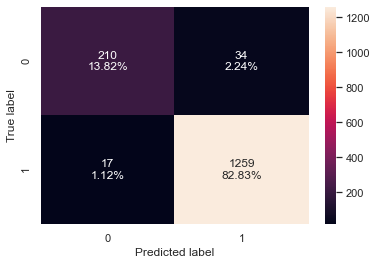

In [102]:
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned, X_test, y_test)

In [103]:
# Calculating different metrics on validation set
GB_over_tuned_test_perf = model_performance_classification_sklearn(
    GB_over_tuned, X_test, y_test
)
print("Test performance:")
GB_over_tuned_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.975658  0.989812   0.981352  0.985564

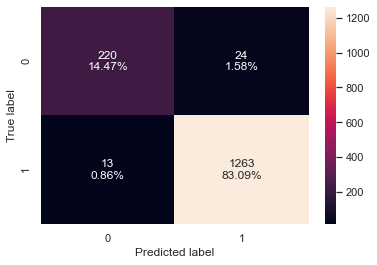

In [104]:
# creating confusion matrix
confusion_matrix_sklearn(GB_over_tuned, X_test, y_test)

And from this we can conclude that the best model is the Gradient Boosting w/ over sampling, with an F1 score of 98.5% on the test set. 

In [105]:
best_model=GB_over_tuned

In [106]:
best_model

GradientBoostingClassifier(learning_rate=0.3, n_estimators=180, random_state=1)

# Pipelines for Productionizing the model
Now, we have a final model. let's use pipelines to put the model into production

### Column Transformer¶
* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.


* We will create 2 different pipelines, one for numerical columns and one for categorical columns

* For numerical columns, we will do missing value imputation as pre-processing

* For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

* We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [107]:
#this is simply for organization:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [108]:
#Creating a list of numerical features
numerical_features = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

#creating a list of categorical features
categorical_features = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
]

In [109]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ('scaler',StandardScaler())
    ]
)

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [110]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

In [111]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


In [112]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Gradient Boosting tuned to oversampled data",
            best_model,
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
  

# Business Recommendations

**Specific recommendations from Exploratory Data Analysis**
* A perfect correlation between a customer's credit limit and average open to buy suggests that your customer's aren't using your card. Your card is one of many in a wallet or purse, and is the one least often used, if ever. Your strategies should aim to make your card worthwhile. 
* The correlation between transaction amount and transaction count is also very high, at 0.81. This implies that your customer's use your card on very small purchases. Wouldn't it be nice if your customers used your card to pay for a vacation instead of a candy bar. Your strategies should make the card more useful when making big purchases like vacations during the summer. When looking at the total transaction amount/count change from Q4->Q1 a much lower number indicates that customers are using your card for end of the year winter holiday shopping and such. 


**Reducing attrition and winning back customers requires strong action plans that are marketed specifically toward former customers, or customers you might suspect are at risk of attriting**

* one might use the model to predict customers at risk of attriting and conduct phone interviews to ask these customers what the banks strongest and weakest areas are

* results for the least positive areas might include customer service, rates, or limited programs. The action plan formulated should revolve around the least positive feedback points you recieve

* the buisness model should also be made to adapt to growing attrition
* consider lowering credit card rates temporarily ( in which you take a loss)
* also consider introductory offers (with zero percent interest, for example)
* Changing the buisness plan to focus more on the consumers instead of profits can create a positive feedback loop that ultimately increases clientelle and profits along with it.

* Advertising campaigns can help  -  in which you test each campaign on a small group with different demographics
* attrition rate should continuously be tracked and if the rate does not decrease, new strategies will have to be made and implemented.



**Consider a variety of cards**
* Low interest credit cards - customer aquisition strategy that applies for a limited time
* Instant approval credit cards - aim these at customers with good credit scores
* balance transfer cards - aims at increasing book balance and usage from a customer by being a useful debt consolidation tool because for an intition period the customer does not pay interest on the balance. Balance Transfer charges may be levied here.
* Rewards credit cards -  offer customers points, rewards, or bonuses for every cash purchase made with your card over time

**This model predicts which customers are at risk of attriting and this information can be used:**
* concentrate on retaining customers through active engagement and campaigns.
* active retention strategies can be planned and executed before the client is lost.

